### 1. Import packages

In [229]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import regex as re
sns.set()
import pathlib
from pathlib import Path

import sys
sys.path.append("../src")
from matplotlib.ticker import FormatStrFormatter
from functions import preprocess, sum_freq_per_year, year_freq_df, year_object_count_df, plot_graph, get_Y_range # module with all functions used for the task

### 2. Read data

In [230]:
data = pd.read_excel('data/ATLANTICA_thesis_v0.3.xlsx')

### 3. Prepare data

#### 3.1 Check in which columns numeric values are of an object type
#### 3.2 If found, convert objects into numeric values (float) 
This is essential for performing math operations with these variables

In [231]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               432 non-null    int64  
 1   site             432 non-null    object 
 2   context          432 non-null    object 
 3   class            432 non-null    object 
 4   production       432 non-null    object 
 5   origin_h1        432 non-null    object 
 6   origin_h2        432 non-null    object 
 7   form             432 non-null    object 
 8   form_h2          309 non-null    object 
 9   total fragments  432 non-null    int64  
 10  complete         29 non-null     float64
 11  rims             301 non-null    float64
 12  necks            32 non-null     float64
 13  handles          91 non-null     float64
 14  body sherds      234 non-null    float64
 15  bases            128 non-null    float64
 16  mni              430 non-null    float64
 17  tni             

#### 3.3 Clean text data (from punctuation, double spaces) and lowercase
This is done in order to avoid inconsistency in names, etc. Thus, to avoid errors while counting

In [232]:
cols_for_preprocessing = ['site', 'class', 'production','origin_h1', 'origin_h2', 'form','form_h2']

for i in cols_for_preprocessing:
    data[i] = preprocess(data[i])

#### 3.4 Filtering away certain values of data
If for any reason, any data with a specific value in a certain column should be excluded from the analysis, the following code syntax can be used:

```
data = data[data['column_we_want_to_filter_by'] != 'value_it_should_not_have']
```

!= means not equal to. This signifies that we take all rows of the dataframe which does not have the value specified. 

### 4. Impact of the sample size and quantification methods (Figs. 3-4)

#### 4.1 Group *form* by *origin* and sum frequencies
Sums up both tni and mni frequencies, so both can be used. 

In [233]:
df0 = data.groupby(['origin_h1', 'origin_h2', 'form', 'start_date', 'end_date', 'site'])["tni", "mni"].apply(lambda x : x.sum())
df0 = df0.reset_index()
df0.head()


C:\Users\alba_\AppData\Local\Temp/ipykernel_20104/1534753443.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df0 = data.groupby(['origin_h1', 'origin_h2', 'form', 'start_date', 'end_date', 'site'])["tni", "mni"].apply(lambda x : x.sum())


,origin_h1,origin_h2,form,start_date,end_date,site,tni,mni
0,gaul,lagraufesenque,drag. 15/17,30.0,60.0,armea,3.0,2.0
1,gaul,lagraufesenque,drag. 15/17,30.0,60.0,castromao,1.0,1.0
2,gaul,lagraufesenque,drag. 18/31,30.0,60.0,armea,1.0,1.0
3,gaul,lagraufesenque,drag. 27,40.0,80.0,armea,7.0,6.0
4,gaul,lagraufesenque,drag. 27,40.0,80.0,castromao,1.0,1.0


#### 4.2 Calculate *forma* frequency per year
The next chunks illustrate how to calculate the summed frequcy per year. One should specify frequency value in `sum_freq` argument (tni or mni).

The `sum_freq_per_year` can be used for any number of frequency values. Each run creates a new column in the existing dataframe. The name of the column can be specified with parameter `freq_per_year`. 

In [234]:
df1 = sum_freq_per_year(df0,
                        sum_freq = 'tni',
                        lower_date = 'start_date',
                        upper_date = 'end_date',
                        freq_per_year = 'sum_freq_per_year_tni')
df1.head()

,origin_h1,origin_h2,form,start_date,end_date,site,tni,mni,sum_freq_per_year_tni
0,gaul,lagraufesenque,drag. 15/17,30.0,60.0,armea,3.0,2.0,0.100000
1,gaul,lagraufesenque,drag. 15/17,30.0,60.0,castromao,1.0,1.0,0.033333
2,gaul,lagraufesenque,drag. 18/31,30.0,60.0,armea,1.0,1.0,0.033333
3,gaul,lagraufesenque,drag. 27,40.0,80.0,armea,7.0,6.0,0.175000
4,gaul,lagraufesenque,drag. 27,40.0,80.0,castromao,1.0,1.0,0.025000


In [235]:
df1 = sum_freq_per_year(df0,
                        sum_freq = 'mni',
                        lower_date = 'start_date',
                        upper_date = 'end_date',
                        freq_per_year = 'sum_freq_per_year_mni')
df1.head()

,origin_h1,origin_h2,form,start_date,end_date,site,tni,mni,sum_freq_per_year_tni,sum_freq_per_year_mni
0,gaul,lagraufesenque,drag. 15/17,30.0,60.0,armea,3.0,2.0,0.100000,0.066667
1,gaul,lagraufesenque,drag. 15/17,30.0,60.0,castromao,1.0,1.0,0.033333,0.033333
2,gaul,lagraufesenque,drag. 18/31,30.0,60.0,armea,1.0,1.0,0.033333,0.033333
3,gaul,lagraufesenque,drag. 27,40.0,80.0,armea,7.0,6.0,0.175000,0.150000
4,gaul,lagraufesenque,drag. 27,40.0,80.0,castromao,1.0,1.0,0.025000,0.025000


#### 4.3 Create a two-column dataframe with years and frequency values
This needs to be done for all levels of origin that should be included in the final plot. If for example, you want three different origins (e.g. Gaul, Italy, Iberian Peninsula), three different frequency dataframes should be made. 

It is also possible to plot a line, which sums serveral levels of the variable. This can be done using the following syntax:

`freq_df = year_freq_df(df1[(df1['origin_h1'] == 'italy') | (df1['origin_h1'] == 'gaul')]`

One can (not) consider any values for the calculations. F.ex., to look into `origin_h1 == iberianpeninsula` but to exclude `origin_h2 == local`, specify

`df1[(df1['origin_h1'] == 'iberianpeninsula') & (df1['origin_h2'] != 'local')]` in the first argument in the `year_freq_df` function.

In [236]:
## Figure 3a
#Query without SCL

freq_df3 = year_freq_df(df1[(df1['site'] != 'san cibran de las')],
                    lower_date = 'start_date',
                    upper_date = 'end_date',
                    sum_freq = 'sum_freq_per_year_mni')

#Query with SCL

freq_df4 = year_freq_df(df1[(df1['site'] == 'san cibran de las') | (df1['site'] == 'castromao') | (df1['site'] == 'armea') | (df1['site'] == 'laias')],
                    lower_date = 'start_date',
                    upper_date = 'end_date',
                    sum_freq = 'sum_freq_per_year_mni')

In [237]:
df_dictionary2 = {'All pottery with Las': freq_df4, 'All pottery without Las': freq_df3,}

C:\Users\alba_\AppData\Local\Temp/ipykernel_20104/506072190.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


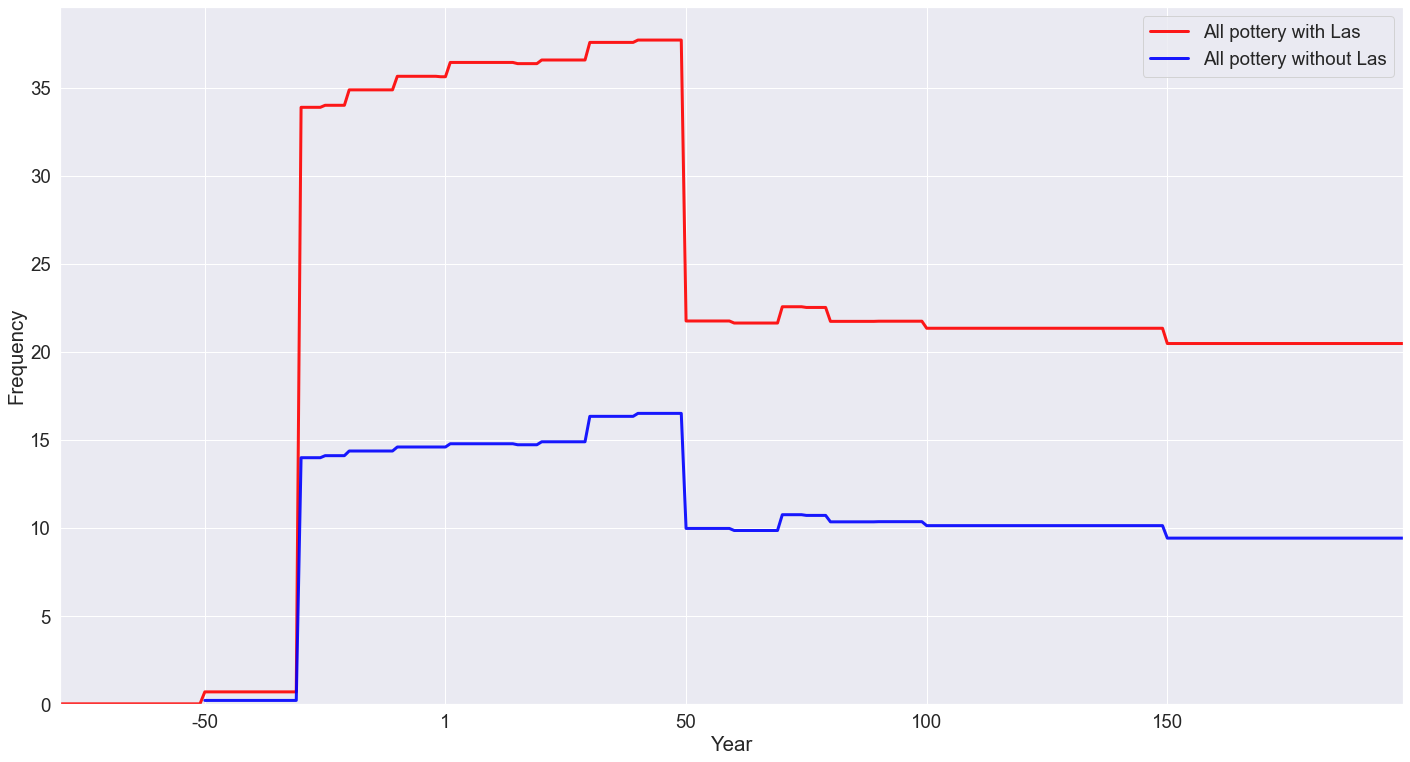

In [238]:

sns.set(font_scale=1.7)


fig, ax = plt.subplots(figsize=(20, 11))

#Calculate minimum and maximum Y values to define the cuff off further
minimum, maximum = get_Y_range(df_dictionary2)

plot_graph(dicts_of_df = df_dictionary2,
           palette=['red', 'blue'],  
           linestyle = 'solid',
           ax = ax)
           

# Cut off the range of Y value shown 
ax.set_xlim(minimum, maximum)

# Remove 0 from Y axis
ax.set_ylim(0, None)


#Change Y values format 
# integers = '%.0f'
# decimals = '%.1f', the number before 'f' defines how many values to show after dot
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))  

ax.set_ylabel("Frequency")
ax.set_xlabel("Year")

#To hide values on axis
#ax.axes.xaxis.set_ticks([])
#ax.axes.yaxis.set_ticks([])

# Make sure that if 0 is included on the x-axis it is turned into 1 instead
ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


plt.tight_layout()


# Save the graph
plt.savefig('./Fig3a.png')


In [239]:
## Figure 3b
#Query without SCL


freq_df_imports1 = year_freq_df(df1[(df1['origin_h1'] == 'iberianpeninsula') & (df1['origin_h2'] != 'local') | (df1['origin_h1'] == 'gaul') | (df1['origin_h1'] == 'italy') & (df1['site'] != 'san cibran de las')],
                    lower_date = 'start_date',
                    upper_date = 'end_date',
                    sum_freq = 'sum_freq_per_year_mni')
#Query with SCL
freq_df_imports2 = year_freq_df(df1[(df1['origin_h1'] == 'iberianpeninsula') & (df1['origin_h2'] != 'local') | (df1['origin_h1'] == 'gaul') | (df1['origin_h1'] == 'italy')],
                    lower_date = 'start_date',
                    upper_date = 'end_date',
                    sum_freq = 'sum_freq_per_year_mni')


In [240]:
df_dictionary = {'Imports with Las': freq_df_imports2, 'Imports without Las': freq_df_imports1}

C:\Users\alba_\AppData\Local\Temp/ipykernel_20104/475406900.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


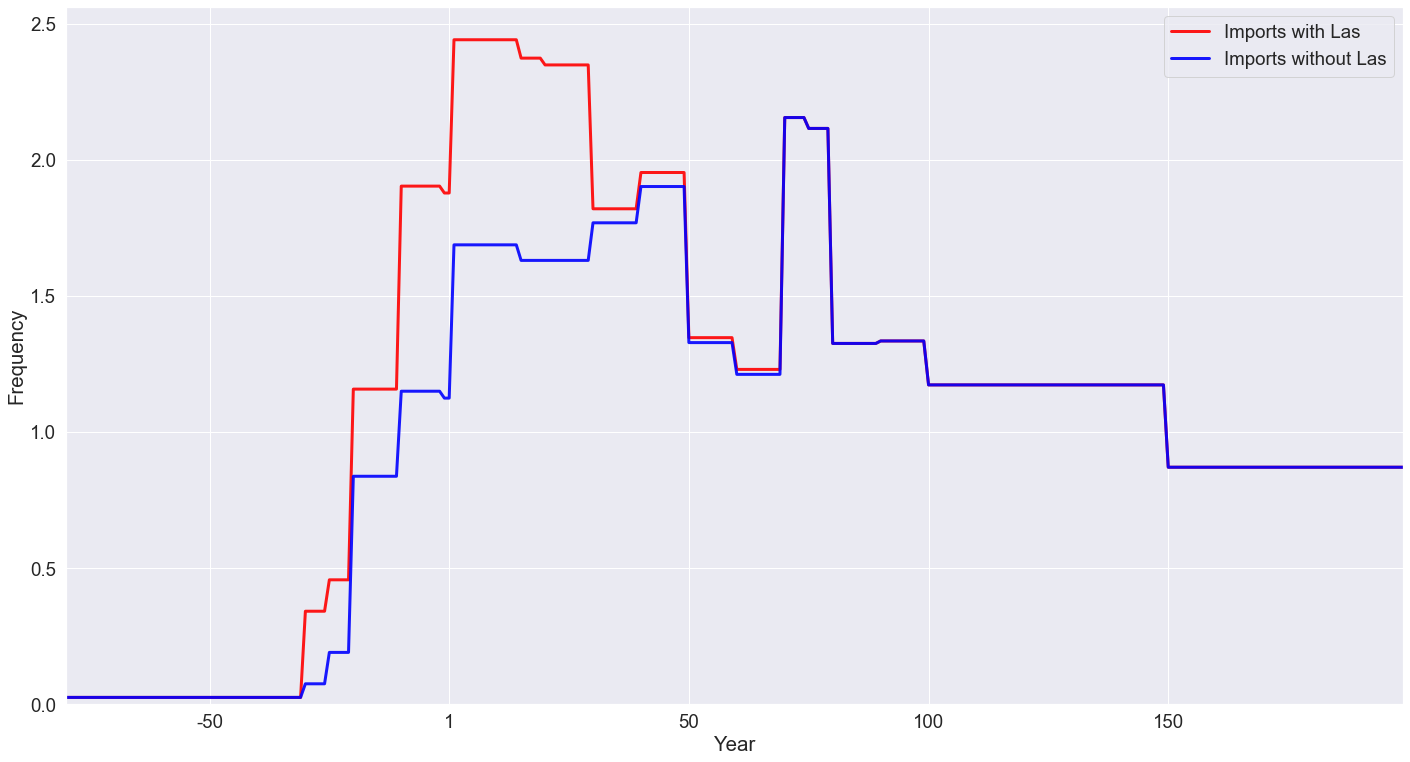

In [241]:
sns.set(font_scale=1.7)


fig, ax = plt.subplots(figsize=(20, 11))

#Calculate minimum and maximum Y values to define the cuff off further
minimum, maximum = get_Y_range(df_dictionary)

plot_graph(dicts_of_df = df_dictionary,
           palette=['red', 'blue'],  
           linestyle = 'solid',
           ax = ax)
           

# Cut off the range of Y value shown 
ax.set_xlim(minimum, maximum)

# Remove 0 from Y axis
ax.set_ylim(0, None)


ax.set_ylabel("Frequency")
ax.set_xlabel("Year")

#To hide values on axis
#ax.axes.xaxis.set_ticks([])
#ax.axes.yaxis.set_ticks([])

# Make sure that if 0 is included on the x-axis it is turned into 1 instead
ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


plt.tight_layout()


# Save the graph
plt.savefig('./Fig3b.png')



C:\Users\alba_\AppData\Local\Temp/ipykernel_20104/3365766891.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([int(i) if i != 0 else 1 for i in ax1.get_xticks()])
C:\Users\alba_\AppData\Local\Temp/ipykernel_20104/3365766891.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels([int(i) if i != 0 else 1 for i in ax2.get_xticks()])


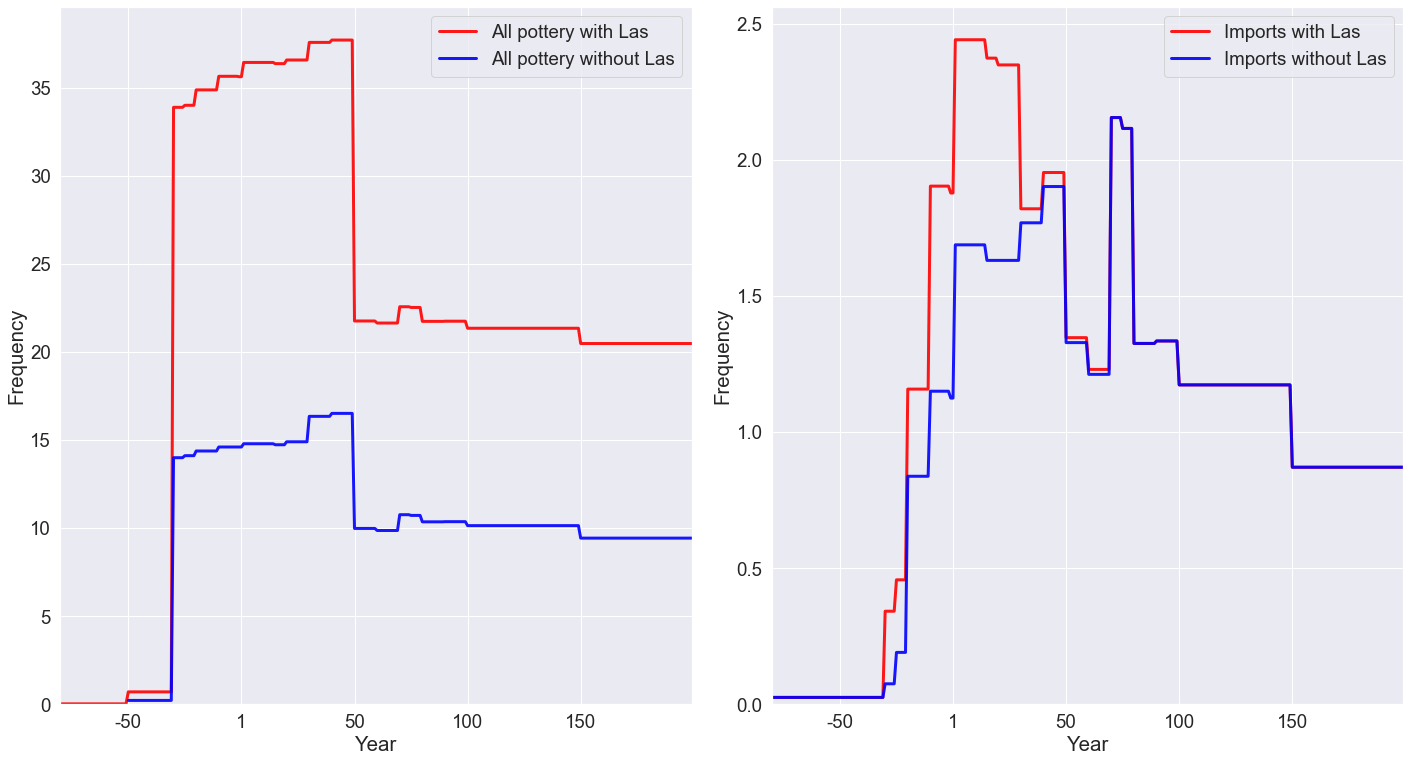

In [242]:
#Plot Fig.3 [Fig3a+Fig3b]

sns.set(font_scale=1.7)

fig, (ax1, ax2)= plt.subplots(nrows=1, ncols=2, figsize=(20, 11))

#Calculate minimum and maximum Y values 
minimum1, maximum1 = get_Y_range(df_dictionary)
minimum2, maximum2 = get_Y_range(df_dictionary2)

plot_graph(dicts_of_df = df_dictionary2,
           palette=['red', 'blue'],
           linestyle = 'solid',
           ax = ax1)
           

plot_graph(dicts_of_df = df_dictionary,
            palette=['red', 'blue'],
            linestyle = 'solid',
            ax = ax2)

# Cut off the range of Y value shown 
ax1.set_xlim(minimum1, maximum1)
ax2.set_xlim(minimum2, maximum2)

# Remove 0 from Y axis
ax1.set_ylim(0, None)
ax2.set_ylim(0, None)


#Change Y values format 
# integers = '%.0f'
# decimals = '%.1f', the number before 'f' defines how many values to show after dot
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))  
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

ax1.set_ylabel("Frequency")
ax1.set_xlabel("Year")

ax2.set_xlabel("Year")
ax2.set_ylabel("Frequency")


#To hide values on axis
#ax1.axes.xaxis.set_ticks([])
#ax1.axes.yaxis.set_ticks([])
#ax2.axes.xaxis.set_ticks([])
#ax2.axes.yaxis.set_ticks([])


# Make sure that if 0 is included on the x-axis it is turned into 1 instead
ax1.set_xticklabels([int(i) if i != 0 else 1 for i in ax1.get_xticks()])


ax2.set_xticklabels([int(i) if i != 0 else 1 for i in ax2.get_xticks()])

plt.tight_layout()


# Save the graph
plt.savefig('./fig3.png')

In [133]:
## Figure 4a
#TNI
freq_df5 = year_freq_df(df1[(df1['site'] == 'san cibran de las') | (df1['site'] == 'castromao') | (df1['site'] == 'armea') | (df1['site'] == 'laias')],
                    lower_date = 'start_date',
                    upper_date = 'end_date',
                    sum_freq = 'sum_freq_per_year_tni')
#MNI
freq_df6 = year_freq_df(df1[(df1['site'] == 'san cibran de las') | (df1['site'] == 'castromao') | (df1['site'] == 'armea') | (df1['site'] == 'laias')],
                    lower_date = 'start_date',
                    upper_date = 'end_date',
                    sum_freq = 'sum_freq_per_year_mni')

In [134]:
df_dictionary3 = {'All pottery counted by MNI method': freq_df6, 'All pottery counted by TNI method': freq_df5,}

C:\Users\alba_\AppData\Local\Temp/ipykernel_20104/3337440333.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


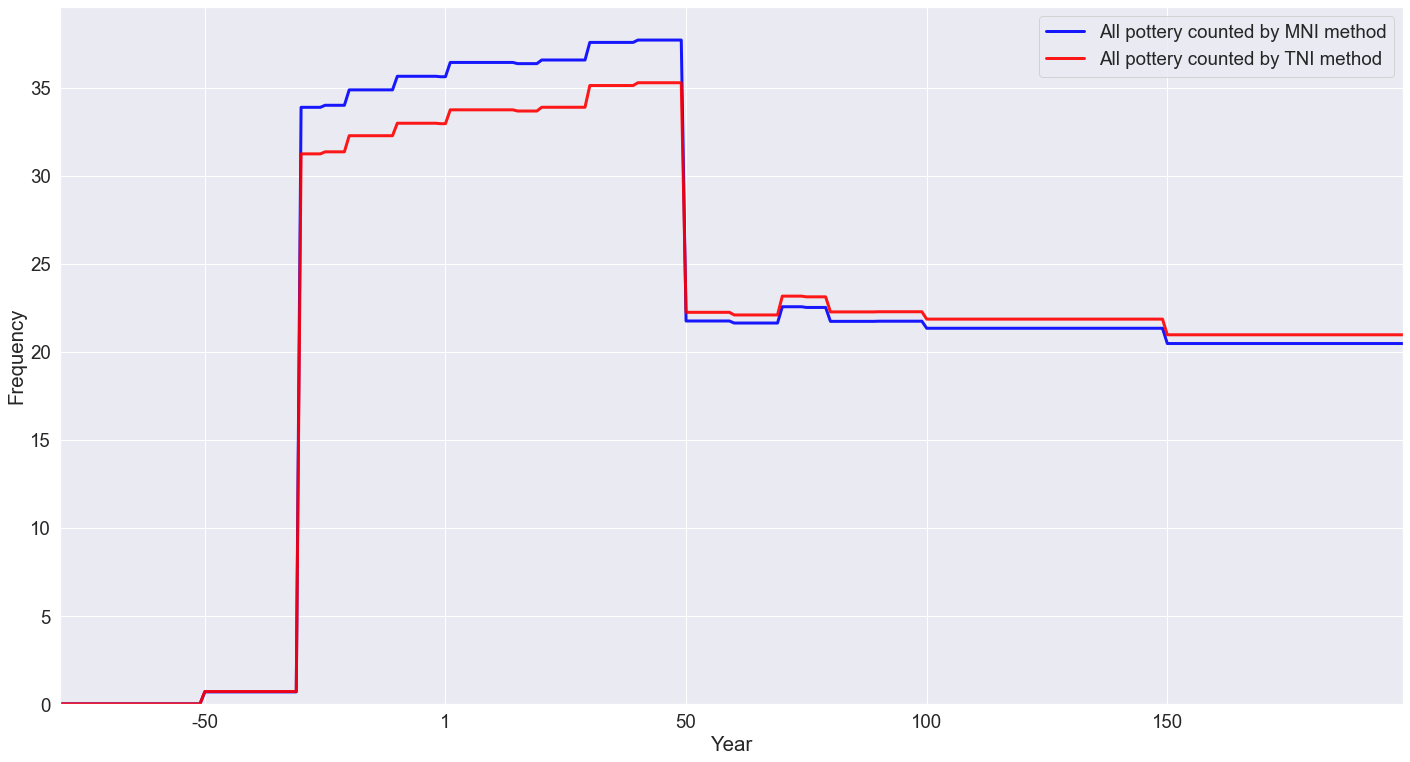

In [135]:
sns.set(font_scale=1.7)


fig, ax = plt.subplots(figsize=(20, 11))

#Calculate minimum and maximum Y values to define the cuff off further
minimum, maximum = get_Y_range(df_dictionary3)

plot_graph(dicts_of_df = df_dictionary3,
           palette=['blue', 'red'],  
           linestyle='solid',
          ax = ax)
           

# Cut off the range of Y value shown 
ax.set_xlim(minimum, maximum)

# Remove 0 from Y axis
ax.set_ylim(0, None)


#Change Y values format 
# integers = '%.0f'
# decimals = '%.1f', the number before 'f' defines how many values to show after dot
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))  

ax.set_ylabel("Frequency")
ax.set_xlabel("Year")

#To hide values on axis
#ax.axes.xaxis.set_ticks([])
#ax.axes.yaxis.set_ticks([])

# Make sure that if 0 is included on the x-axis it is turned into 1 instead
ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


plt.tight_layout()


# Save the graph
plt.savefig('./Fig4a.png')

In [136]:
## Figure 4b
#MNI
freq_df_imports7 = year_freq_df(df1[(df1['origin_h2'] != 'local')],
                    lower_date = 'start_date',
                    upper_date = 'end_date',
                    sum_freq = 'sum_freq_per_year_mni')
#TNI
freq_df_imports8 = year_freq_df(df1[(df1['origin_h2'] != 'local')],
                    lower_date = 'start_date',
                    upper_date = 'end_date',
                    sum_freq = 'sum_freq_per_year_tni')

In [137]:
df_dictionary4 = {'Imports counted by MNI method': freq_df_imports7, 'Imports counted by TNI method': freq_df_imports8}

C:\Users\alba_\AppData\Local\Temp/ipykernel_20104/4251440814.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


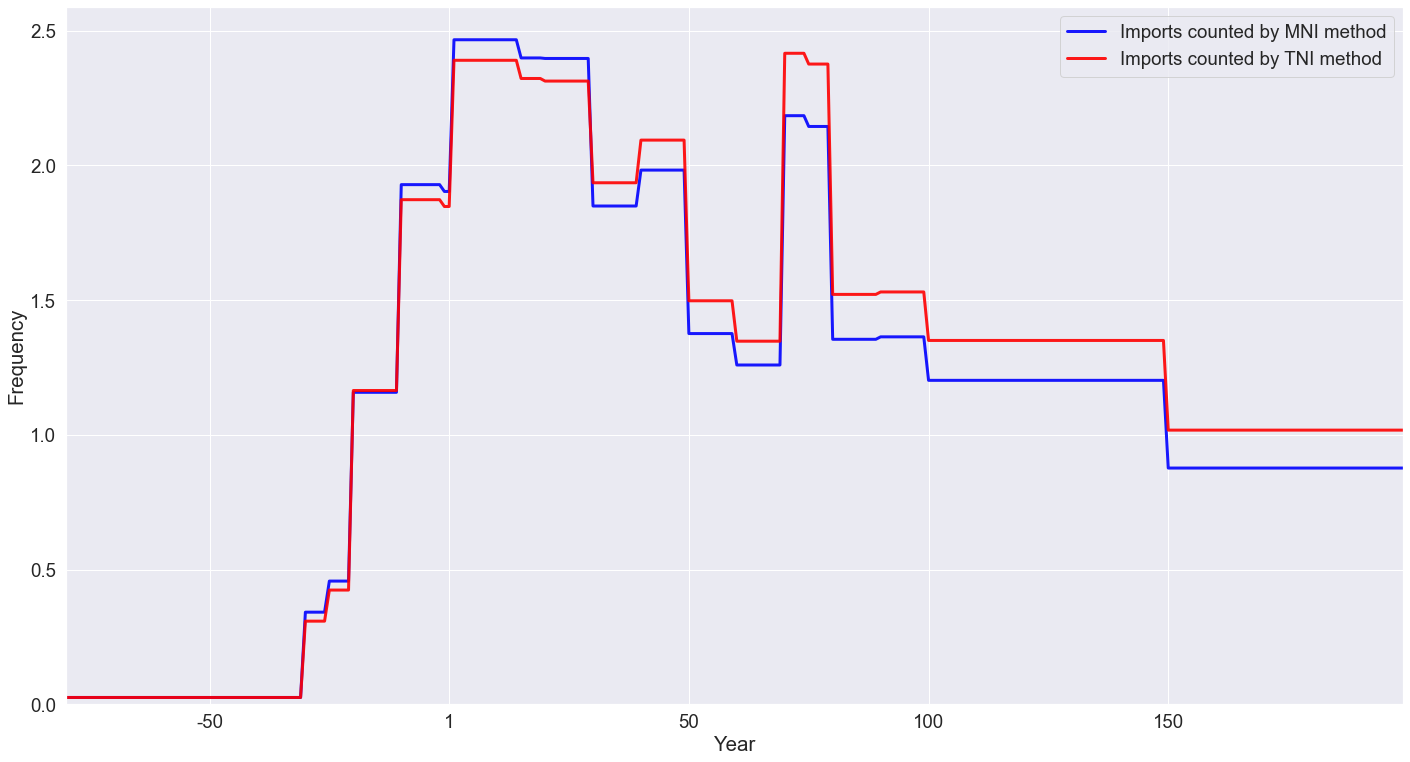

In [138]:
sns.set(font_scale=1.7)


fig, ax = plt.subplots(figsize=(20, 11))

#Calculate minimum and maximum Y values to define the cuff off further
minimum, maximum = get_Y_range(df_dictionary4)

plot_graph(dicts_of_df = df_dictionary4,
           palette=['blue','red'],  
           linestyle = 'solid',
           ax = ax)


# Cut off the range of Y value shown 
ax.set_xlim(minimum, maximum)

# Remove 0 from Y axis
ax.set_ylim(0, None)



#Change Y values format 
# integers = '%.0f'
# decimals = '%.1f', the number before 'f' defines how many values to show after dot
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))  

ax.set_ylabel("Frequency")
ax.set_xlabel("Year")

#To hide values on axis
#ax.axes.xaxis.set_ticks([])
#ax.axes.yaxis.set_ticks([])

# Make sure that if 0 is included on the x-axis it is turned into 1 instead
ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


plt.tight_layout()


# Save the graph
plt.savefig('./Fig4b.png')

C:\Users\alba_\AppData\Local\Temp/ipykernel_20104/3137990733.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([int(i) if i != 0 else 1 for i in ax1.get_xticks()])
C:\Users\alba_\AppData\Local\Temp/ipykernel_20104/3137990733.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels([int(i) if i != 0 else 1 for i in ax2.get_xticks()])


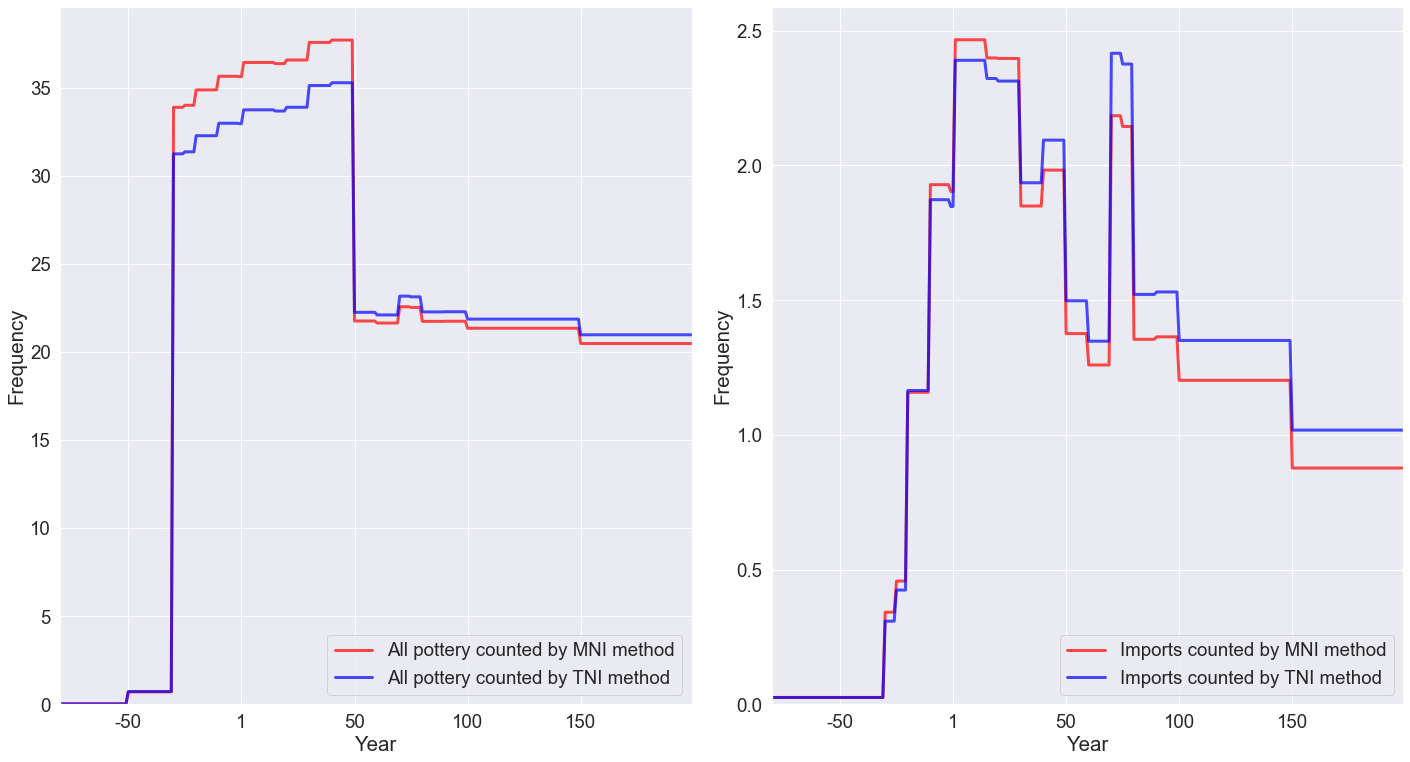

In [139]:
#To plot fig. 4 [Fig.4a+Fig4b]

sns.set(font_scale=1.7)

fig, (ax1, ax2)= plt.subplots(nrows=1, ncols=2, figsize=(20, 11))

#Calculate minimum and maximum Y values 
minimum1, maximum1 = get_Y_range(df_dictionary3)
minimum2, maximum2 = get_Y_range(df_dictionary4)

plot_graph(dicts_of_df = df_dictionary3,
           palette=['red', 'blue'],
           linestyle = 'solid',
           ax = ax1, 
          alpha= 0.7)
           

plot_graph(dicts_of_df = df_dictionary4,
            palette=['red', 'blue'],
            linestyle = 'solid',
            ax = ax2, 
          alpha= 0.7)

# Cut off the range of Y value shown 
ax1.set_xlim(minimum1, maximum1)
ax2.set_xlim(minimum2, maximum2)

# Remove 0 from Y axis
ax1.set_ylim(0, None)
ax2.set_ylim(0, None)


#Change Y values format 
# integers = '%.0f'
# decimals = '%.1f', the number before 'f' defines how many values to show after dot
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))  
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

ax1.set_ylabel("Frequency")
ax1.set_xlabel("Year")

ax2.set_xlabel("Year")
ax2.set_ylabel("Frequency")


#To hide values on axis
#ax1.axes.xaxis.set_ticks([])
#ax1.axes.yaxis.set_ticks([])
#ax2.axes.xaxis.set_ticks([])
#ax2.axes.yaxis.set_ticks([])


# Make sure that if 0 is included on the x-axis it is turned into 1 instead
ax1.set_xticklabels([int(i) if i != 0 else 1 for i in ax1.get_xticks()])


ax2.set_xticklabels([int(i) if i != 0 else 1 for i in ax2.get_xticks()])

plt.tight_layout()


# Save the graph
plt.savefig('./fig4.png')

### 5.Non local products per site and per origin_h1 (Fig. 5-6)

### 5.1 Group forma by origin_h2 and sum frequencies
Specify if you want the frequency mni or tni in the below chunk

In [140]:
df0 = data.groupby(['origin_h1','origin_h2', 'form', 'start_date', 'end_date', 'site'])['tni', 'mni'].apply(lambda x : x.sum())
##data = data[data['form'] != 'indeterminada'] 
df0 = df0.reset_index()
df0.head()



C:\Users\alba_\AppData\Local\Temp/ipykernel_20104/1295072903.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df0 = data.groupby(['origin_h1','origin_h2', 'form', 'start_date', 'end_date', 'site'])['tni', 'mni'].apply(lambda x : x.sum())


,origin_h1,origin_h2,form,start_date,end_date,site,tni,mni
0,gaul,lagraufesenque,drag. 15/17,30.0,60.0,armea,3.0,2.0
1,gaul,lagraufesenque,drag. 15/17,30.0,60.0,castromao,1.0,1.0
2,gaul,lagraufesenque,drag. 18/31,30.0,60.0,armea,1.0,1.0
3,gaul,lagraufesenque,drag. 27,40.0,80.0,armea,7.0,6.0
4,gaul,lagraufesenque,drag. 27,40.0,80.0,castromao,1.0,1.0


#### 5.2 Calculate *form* frequency per year

In [141]:
df1 = sum_freq_per_year(df0,
                        sum_freq = 'tni',
                        lower_date = 'start_date',
                        upper_date = 'end_date',
                        freq_per_year = 'sum_freq_per_year_tni')
df1.head()

,origin_h1,origin_h2,form,start_date,end_date,site,tni,mni,sum_freq_per_year_tni
0,gaul,lagraufesenque,drag. 15/17,30.0,60.0,armea,3.0,2.0,0.100000
1,gaul,lagraufesenque,drag. 15/17,30.0,60.0,castromao,1.0,1.0,0.033333
2,gaul,lagraufesenque,drag. 18/31,30.0,60.0,armea,1.0,1.0,0.033333
3,gaul,lagraufesenque,drag. 27,40.0,80.0,armea,7.0,6.0,0.175000
4,gaul,lagraufesenque,drag. 27,40.0,80.0,castromao,1.0,1.0,0.025000


In [142]:
df1 = sum_freq_per_year(df0,
                        sum_freq = 'mni',
                        lower_date = 'start_date',
                        upper_date = 'end_date',
                        freq_per_year = 'sum_freq_per_year_mni')
df1.head()

,origin_h1,origin_h2,form,start_date,end_date,site,tni,mni,sum_freq_per_year_tni,sum_freq_per_year_mni
0,gaul,lagraufesenque,drag. 15/17,30.0,60.0,armea,3.0,2.0,0.100000,0.066667
1,gaul,lagraufesenque,drag. 15/17,30.0,60.0,castromao,1.0,1.0,0.033333,0.033333
2,gaul,lagraufesenque,drag. 18/31,30.0,60.0,armea,1.0,1.0,0.033333,0.033333
3,gaul,lagraufesenque,drag. 27,40.0,80.0,armea,7.0,6.0,0.175000,0.150000
4,gaul,lagraufesenque,drag. 27,40.0,80.0,castromao,1.0,1.0,0.025000,0.025000


#### 5.3 Create a two-column dataframe with years and frequency values
This needs to be done for all levels of origin that should be included in the final plot. If for example, you want three different origins, three different frequency dataframes should be made. 

It is also possible to plot a line, which sums of serveral levels of the variable. This can be done using the following syntax:

`freq_df = year_freq_df(df1[(df1['origin_h1'] == 'italy') | (df1['origin_h1'] == 'gaul')]`

#### 5.4 Group *form* by *origin* and sum frequencies
Sums up both tni and mni frequencies, so both can be used. 

In [143]:
df0 = data.groupby(['origin_h1', 'origin_h2', 'form', 'start_date', 'end_date', 'site'])["tni", "mni"].apply(lambda x : x.sum())
df0 = df0.reset_index()
df0.head()

C:\Users\alba_\AppData\Local\Temp/ipykernel_20104/581327983.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df0 = data.groupby(['origin_h1', 'origin_h2', 'form', 'start_date', 'end_date', 'site'])["tni", "mni"].apply(lambda x : x.sum())


,origin_h1,origin_h2,form,start_date,end_date,site,tni,mni
0,gaul,lagraufesenque,drag. 15/17,30.0,60.0,armea,3.0,2.0
1,gaul,lagraufesenque,drag. 15/17,30.0,60.0,castromao,1.0,1.0
2,gaul,lagraufesenque,drag. 18/31,30.0,60.0,armea,1.0,1.0
3,gaul,lagraufesenque,drag. 27,40.0,80.0,armea,7.0,6.0
4,gaul,lagraufesenque,drag. 27,40.0,80.0,castromao,1.0,1.0


In [144]:
## Non local products per site (all sites)
#Figure 5

freq_import_laias = year_freq_df(df1[(df1['origin_h2'] != 'local') & (df1['site'] == 'laias')],
                                   lower_date = 'start_date',  
                                   upper_date = 'end_date',
                                   sum_freq = 'sum_freq_per_year_mni')

freq_import_las = year_freq_df(df1[(df1['origin_h2'] != 'local') & (df1['site'] == 'san cibran de las')],
                                   lower_date = 'start_date',  
                                   upper_date = 'end_date',
                                   sum_freq = 'sum_freq_per_year_mni')


freq_import_castromao = year_freq_df(df1[(df1['origin_h2'] != 'local') & (df1['site'] == 'castromao')],
                                   lower_date = 'start_date',  
                                   upper_date = 'end_date',
                                   sum_freq = 'sum_freq_per_year_mni')

freq_import_armea = year_freq_df(df1[(df1['origin_h2'] != 'local') & (df1['site'] == 'armea')],
                                   lower_date = 'start_date',  
                                   upper_date = 'end_date',
                                   sum_freq = 'sum_freq_per_year_mni')

In [145]:
df_dictionary6 = {'Laias': freq_import_laias, 'San Cibran de Las': freq_import_las, 'Castromao': freq_import_castromao, 'Armea': freq_import_armea}

C:\Users\alba_\AppData\Local\Temp/ipykernel_20104/3696463764.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


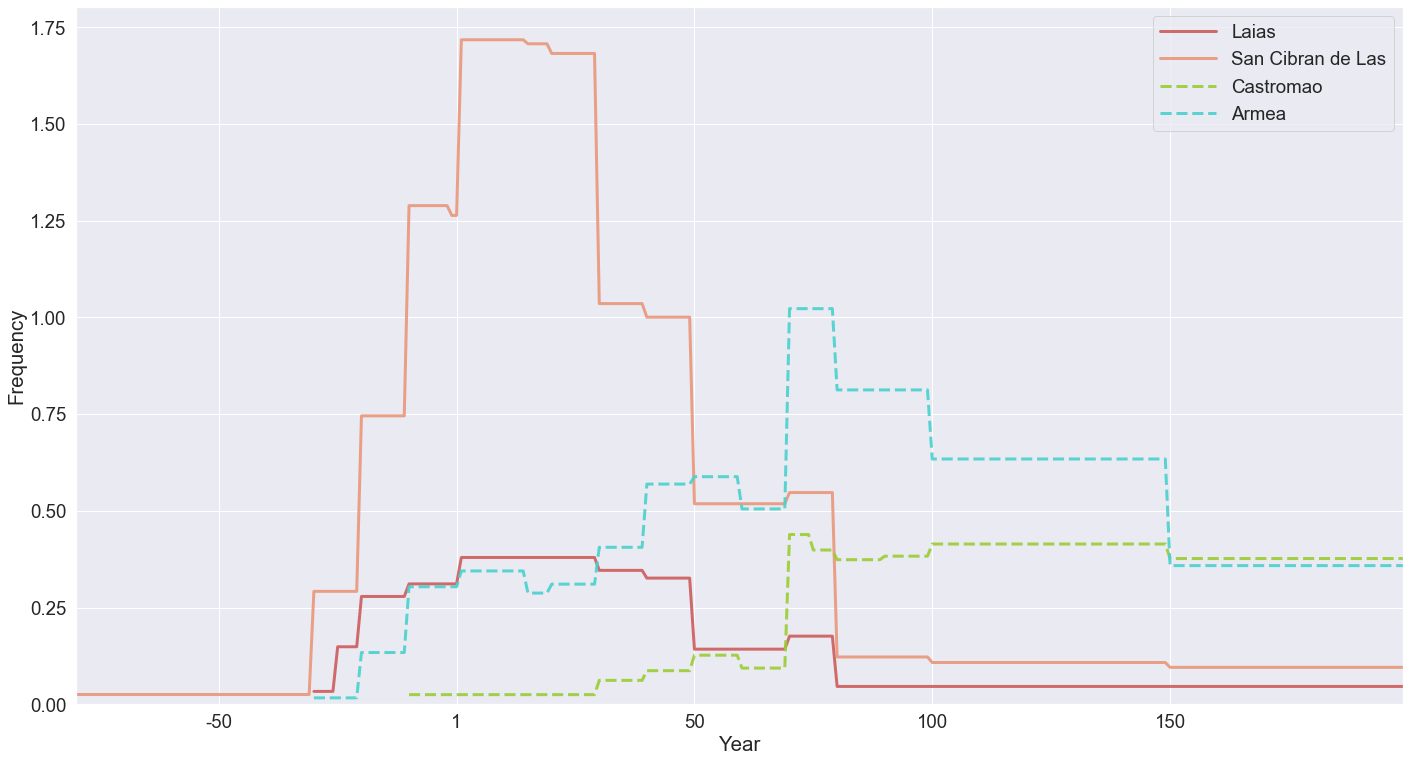

In [146]:
sns.set(font_scale=1.7)



fig, ax = plt.subplots(figsize=(20, 11))

#Calculate minimum and maximum Y values to define the cuff off further
minimum, maximum = get_Y_range(df_dictionary6)

plot_graph(dicts_of_df = df_dictionary6,
           palette=['indianred', 'darksalmon', 'yellowgreen', 'mediumturquoise'],  
           ax = ax)
           
#Change the style of a specific line            
ax.lines[0].set_linestyle("-") 
ax.lines[1].set_linestyle("-") 
ax.lines[2].set_linestyle("--") 
ax.lines[3].set_linestyle("--") 

# Cut off the range of Y value shown 
ax.set_xlim(minimum, maximum)

# Remove 0 from Y axis
ax.set_ylim(0, None)



ax.set_ylabel("Frequency")
ax.set_xlabel("Year")

#To hide values on axis
#ax.axes.xaxis.set_ticks([])
#ax.axes.yaxis.set_ticks([])

# Make sure that if 0 is included on the x-axis it is turned into 1 instead
ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])

#to change the legend
plt.legend(handlelength=3)


plt.tight_layout()


# Save the graph
plt.savefig('./Fig5.png')

In [147]:
##Frequency of non local products per origin
#Fig6

freq_ibimports = year_freq_df(df1[(df1['origin_h1'] == 'iberianpeninsula') & (df1['origin_h2'] != 'local')],
                                   lower_date = 'start_date',  
                                   upper_date = 'end_date',
                                   sum_freq = 'sum_freq_per_year_mni')

freq_gaul = year_freq_df(df1[df1['origin_h1'] == 'gaul'],
                                   lower_date = 'start_date',  
                                   upper_date = 'end_date',
                                   sum_freq = 'sum_freq_per_year_mni')

freq_italy = year_freq_df(df1[df1['origin_h1'] == 'italy'],
                                   lower_date = 'start_date',  
                                   upper_date = 'end_date',
                                   sum_freq = 'sum_freq_per_year_mni')

In [148]:
df_dictionary9 = {'Italy': freq_italy, 'Gaul': freq_gaul, 'Hispania': freq_ibimports}

C:\Users\alba_\AppData\Local\Temp/ipykernel_20104/1946670891.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


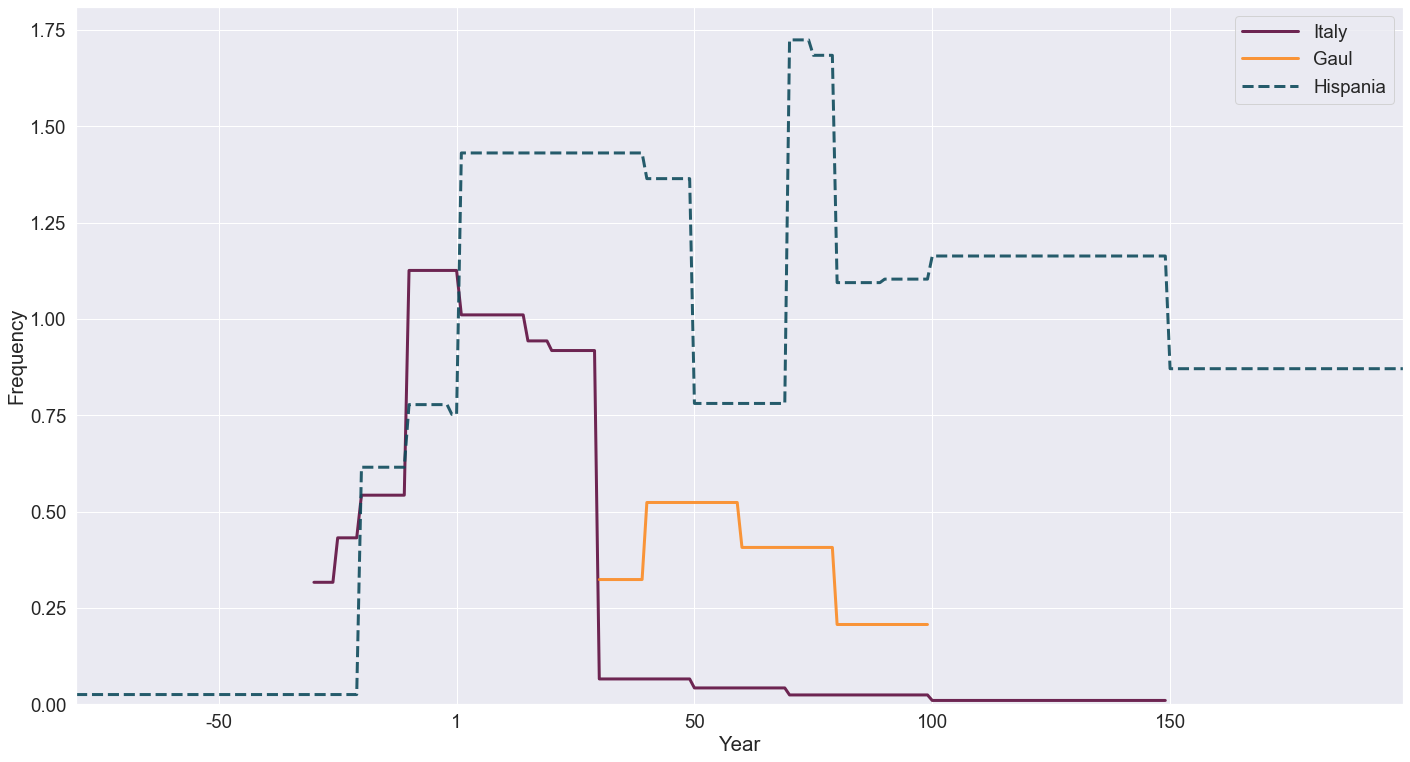

In [149]:
sns.set(font_scale=1.7)



fig, ax = plt.subplots(figsize=(20, 11))

#Calculate minimum and maximum Y values to define the cuff off further
minimum, maximum = get_Y_range(df_dictionary9)

plot_graph(dicts_of_df = df_dictionary9,
           palette=['#5f0f40', '#FB8B24','#0F4C5C'],  
           ax = ax )
           
#Change the style of a specific line            
ax.lines[0].set_linestyle("-") 
ax.lines[1].set_linestyle("-") 
ax.lines[2].set_linestyle("--") 


# Cut off the range of Y value shown 
ax.set_xlim(minimum, maximum)

# Remove 0 from Y axis
ax.set_ylim(0, None)



ax.set_ylabel("Frequency")
ax.set_xlabel("Year")

#To hide values on axis
#ax.axes.xaxis.set_ticks([])
#ax.axes.yaxis.set_ticks([])

# Make sure that if 0 is included on the x-axis it is turned into 1 instead
ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])

#to change the legend
plt.legend(handlelength=3)


plt.tight_layout()


# Save the graph
plt.savefig('./Fig6.png')

### 6. Unique class per origin_h1 (Fig.7)

#### 6.1 Identify the list of *clase* per *forma* and *origin_h1* in *forma* date range. Save *clase* in a list.

**Note:** It is possible to modyfy the query so that *origin_h1* is not considered.  In this case, simply remove `'origin_h1'` label from the first line in the cell `data.groupby(['site', 'start_date', 'end_date'])['forma'].apply(lambda x: ','.join(x))`.

In [150]:
df0 = data.groupby(['form', 'start_date', 'end_date', 'origin_h1', 'origin_h2'])['class'].apply(lambda x: ','.join(x))
df0 = df0.apply(lambda x: x.split(','))
df0 = df0.reset_index()
df0 = df0.rename(columns = {'class':'List_of_class'})
df0.head()

,form,start_date,end_date,origin_h1,origin_h2,List_of_class
0,anfora de fondo plano,20.0,150.0,iberianpeninsula,local,"[anfora, anfora , anfora, anfora, anfora, anfo..."
1,anfora de fondo plano,20.0,150.0,unknown,unknown,[anfora]
2,barrenho,-20.0,50.0,iberianpeninsula,local,"[ceramica comun, ceramica comun, ceramica comu..."
3,botella,30.0,200.0,iberianpeninsula,local,"[ceramica comun, ceramica comun]"
4,brac. 24/25,50.0,100.0,iberianpeninsula,bracaraaugusta,[vajilla fina]


#### 6.2 Count the number of unique *clase* for a specific *origin_h1*

**Note**: If *origin_h1* is not considered in the query, specify the whole dataframe (`df0`) as the first argument in the function 

In [151]:
##Class per origin_h1
#Fig7

count_gaul = year_object_count_df(df0[df0['origin_h1'] == 'gaul'],
                                  lower_date = 'start_date',  
                                  upper_date = 'end_date',
                                  object_list = 'List_of_class') 

count_italy = year_object_count_df(df0[df0['origin_h1'] == 'italy'], 
                                   lower_date = 'start_date',  
                                   upper_date = 'end_date',
                                   object_list = 'List_of_class') 

count_ibp = year_object_count_df(df0[(df0['origin_h1'] == 'iberianpeninsula') & (df0['origin_h2'] != 'local')], 
                                   lower_date = 'start_date',  
                                   upper_date = 'end_date',
                                   object_list = 'List_of_class') 

#### 6.3 Plot the graphs

#### 6.3.1 Create a dictionary for plotting

In [152]:
df_dictionary = {'Gaul': count_gaul, 'Italy': count_italy, 'Hispania': count_ibp}

#### 6.3.2 Plot and save

C:\Users\alba_\AppData\Local\Temp/ipykernel_20104/1006245440.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


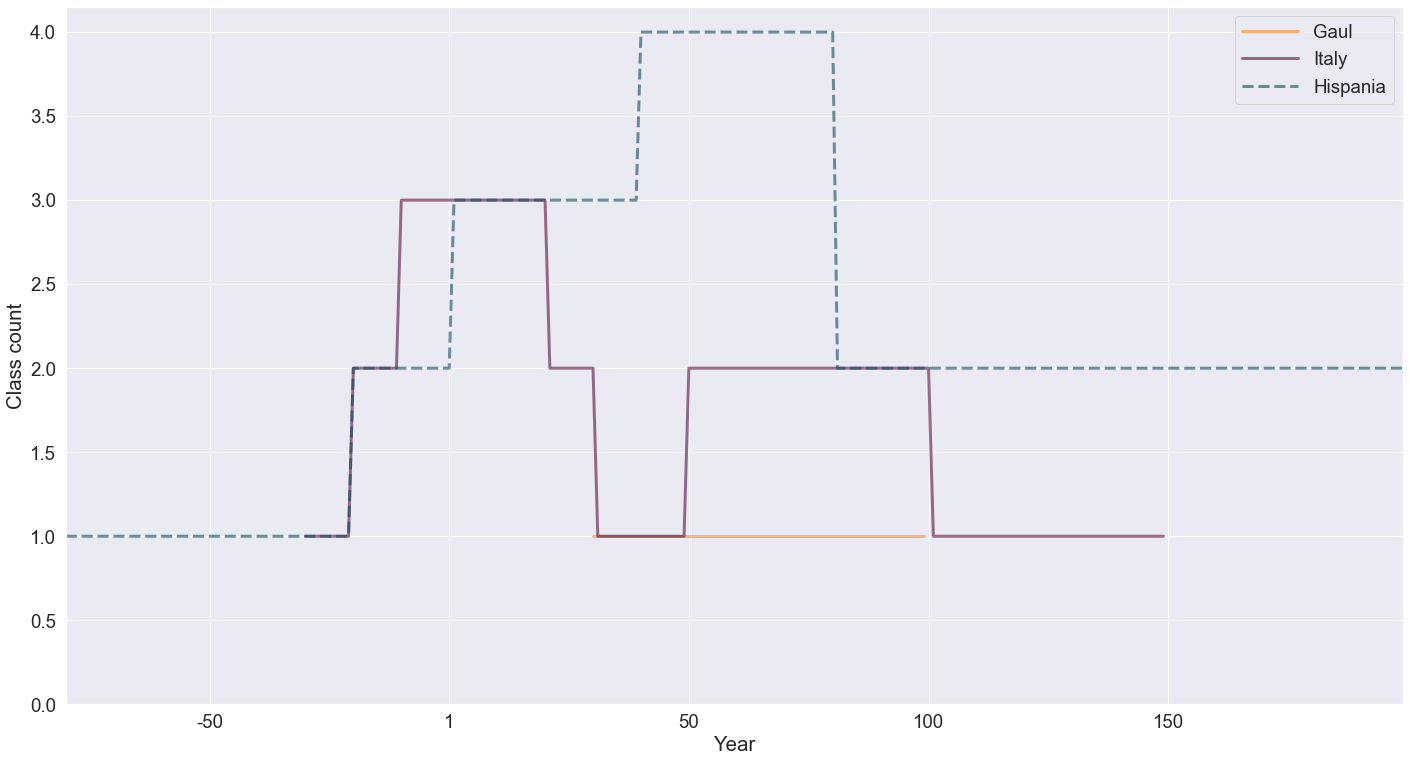

In [153]:
sns.set(font_scale=1.7)



fig, ax = plt.subplots(figsize=(20, 11))

#Calculate minimum and maximum Y values to define the cuff off further
minimum, maximum = get_Y_range(df_dictionary)

plot_graph(dicts_of_df = df_dictionary,
           palette=['#FB8B24','#5f0f40','#0F4C5C'],  
           ax = ax, 
          alpha = 0.6)
           
#Change the style of a specific line            
ax.lines[0].set_linestyle("-") 
ax.lines[1].set_linestyle("-") 
ax.lines[2].set_linestyle("--") 


# Cut off the range of Y value shown 
ax.set_xlim(minimum, maximum)

# Remove 0 from Y axis
ax.set_ylim(0, None)



ax.set_ylabel("Class count")
ax.set_xlabel("Year")

#To hide values on axis
#ax.axes.xaxis.set_ticks([])
#ax.axes.yaxis.set_ticks([])

# Make sure that if 0 is included on the x-axis it is turned into 1 instead
ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])

#to change the legend
plt.legend(handlelength=3)


plt.tight_layout()


# Save the graph
plt.savefig('./Fig7.png')

### 7. Ceramic type diversity (Fig. 8)

#### 7.1 Identify the list of *forma types* per *origin_h1* in *forma* date range. Save *forms* in a list..

In [154]:
df0 = data.groupby(['start_date', 'end_date', 'origin_h1', 'origin_h2'])['form'].apply(lambda x: ','.join(x))
##data = data[data['forma'] != 'indeterminada']  ##para excluir las formas indeterminadas de la contabilización
##data = data[data['forma'] == 'olla']  ##para excluir todas las formas menos unadf0 = df0.apply(lambda x: x.split(','))
df0 = df0.reset_index()
df0 = df0.rename(columns = {'form':'List_of_formtypes'})
df0.head()

,start_date,end_date,origin_h1,origin_h2,List_of_formtypes
0,-80.0,-1.0,iberianpeninsula,betica guadalquivir,ovoide 4?
1,-50.0,50.0,iberianpeninsula,local,"fuente,fuente,fuente,fuente,fuente,fuente,fuen..."
2,-30.0,30.0,iberianpeninsula,local,"quesera,quesera"
3,-30.0,30.0,italy,arezzo,consp. b.3.13.
4,-30.0,30.0,italy,etruria,"indeterminada,indeterminada,indeterminada"


#### 7.2 Count the number of unique *forma types*

In [155]:
##Para contar todas las formas presentes en una producción
##Fig8

count_gaul = year_object_count_df(df0[(df0['origin_h1'] == 'gaul')],
                                  lower_date = 'start_date',  
                                  upper_date = 'end_date',
                                  object_list = 'List_of_formtypes')  

count_italy = year_object_count_df(df0[df0['origin_h1'] == 'italy'], 
                                   lower_date = 'start_date',  
                                   upper_date = 'end_date',
                                   object_list = 'List_of_formtypes')

count_iberian = year_object_count_df(df0[(df0['origin_h1'] == 'iberianpeninsula') & (df0['origin_h2'] != 'local')], 
                                   lower_date = 'start_date',  
                                   upper_date = 'end_date',
                                   object_list = 'List_of_formtypes')

In [156]:
df_dictionary = {'Gaul': count_gaul, 'Italy': count_italy, 'Hispania': count_iberian}

C:\Users\alba_\AppData\Local\Temp/ipykernel_20104/2836410079.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


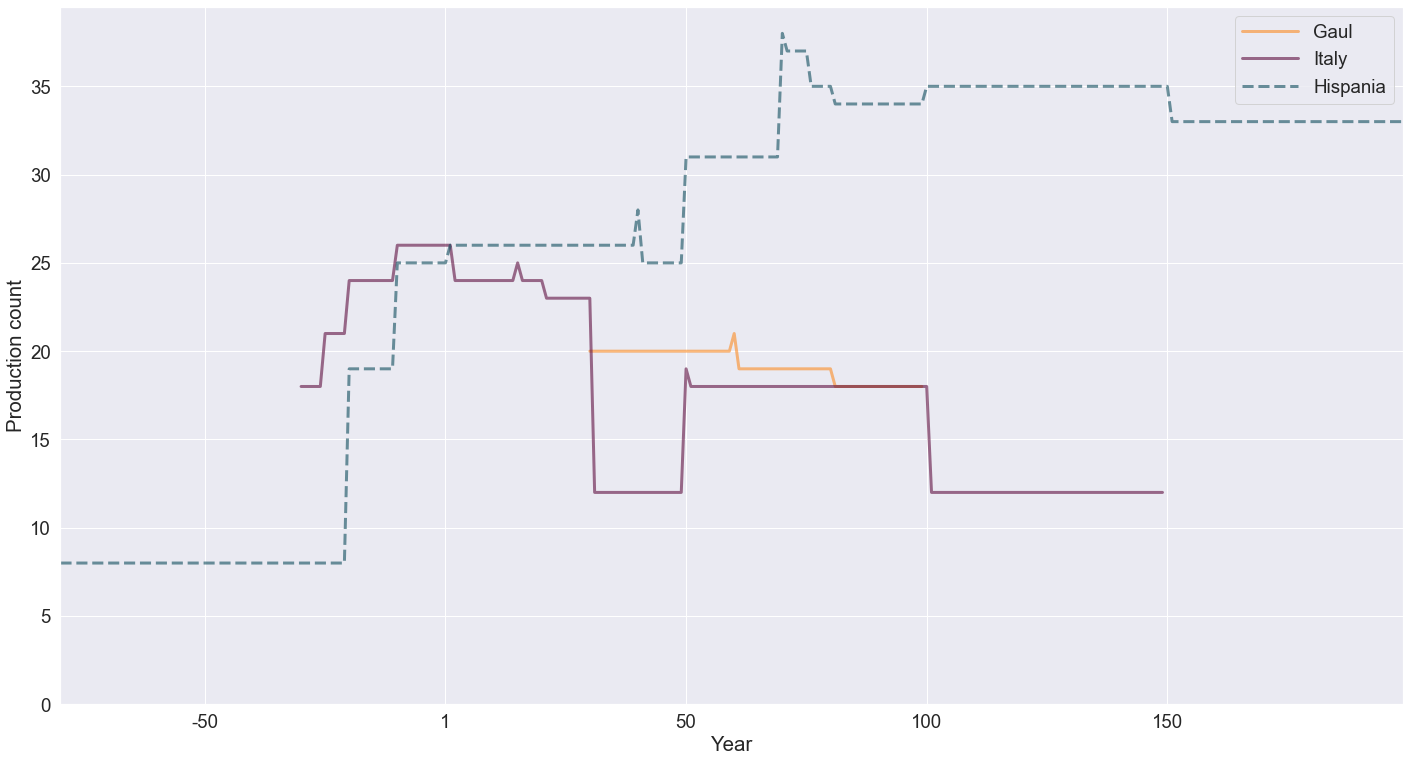

In [157]:
sns.set(font_scale=1.7)



fig, ax = plt.subplots(figsize=(20, 11))

#Calculate minimum and maximum Y values to define the cuff off further
minimum, maximum = get_Y_range(df_dictionary)

plot_graph(dicts_of_df = df_dictionary,
           palette=['#FB8B24','#5f0f40','#0F4C5C'],  
           ax = ax, 
          alpha = 0.6)
           
#Change the style of a specific line            
ax.lines[0].set_linestyle("-") 
ax.lines[1].set_linestyle("-") 
ax.lines[2].set_linestyle("--") 


# Cut off the range of Y value shown 
ax.set_xlim(minimum, maximum)

# Remove 0 from Y axis
ax.set_ylim(0, None)



ax.set_ylabel("Production count")
ax.set_xlabel("Year")

#To hide values on axis
#ax.axes.xaxis.set_ticks([])
#ax.axes.yaxis.set_ticks([])

# Make sure that if 0 is included on the x-axis it is turned into 1 instead
ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])

#to change the legend
plt.legend(handlelength=3)


plt.tight_layout()


# Save the graph
plt.savefig('./Fig8.png')

### 8. Frequency per origin_h2 (Fig.9)

### 8.1 Group forma by origin_h2 and sum frequencies
Specify if you want the frequency mni or tni in the below chunk

In [158]:
df0 = data.groupby(['origin_h1','origin_h2', 'form', 'start_date', 'end_date', 'site'])['tni', 'mni'].apply(lambda x : x.sum())
##data = data[data['form'] != 'indeterminada'] 
df0 = df0.reset_index()
df0.head()



C:\Users\alba_\AppData\Local\Temp/ipykernel_20104/1295072903.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df0 = data.groupby(['origin_h1','origin_h2', 'form', 'start_date', 'end_date', 'site'])['tni', 'mni'].apply(lambda x : x.sum())


,origin_h1,origin_h2,form,start_date,end_date,site,tni,mni
0,gaul,lagraufesenque,drag. 15/17,30.0,60.0,armea,3.0,2.0
1,gaul,lagraufesenque,drag. 15/17,30.0,60.0,castromao,1.0,1.0
2,gaul,lagraufesenque,drag. 18/31,30.0,60.0,armea,1.0,1.0
3,gaul,lagraufesenque,drag. 27,40.0,80.0,armea,7.0,6.0
4,gaul,lagraufesenque,drag. 27,40.0,80.0,castromao,1.0,1.0


#### 8.2 Calculate *form* frequency per year

In [159]:
df1 = sum_freq_per_year(df0,
                        sum_freq = 'tni',
                        lower_date = 'start_date',
                        upper_date = 'end_date',
                        freq_per_year = 'sum_freq_per_year_tni')
df1.head()

,origin_h1,origin_h2,form,start_date,end_date,site,tni,mni,sum_freq_per_year_tni
0,gaul,lagraufesenque,drag. 15/17,30.0,60.0,armea,3.0,2.0,0.100000
1,gaul,lagraufesenque,drag. 15/17,30.0,60.0,castromao,1.0,1.0,0.033333
2,gaul,lagraufesenque,drag. 18/31,30.0,60.0,armea,1.0,1.0,0.033333
3,gaul,lagraufesenque,drag. 27,40.0,80.0,armea,7.0,6.0,0.175000
4,gaul,lagraufesenque,drag. 27,40.0,80.0,castromao,1.0,1.0,0.025000


In [160]:
df1 = sum_freq_per_year(df0,
                        sum_freq = 'mni',
                        lower_date = 'start_date',
                        upper_date = 'end_date',
                        freq_per_year = 'sum_freq_per_year_mni')
df1.head()

,origin_h1,origin_h2,form,start_date,end_date,site,tni,mni,sum_freq_per_year_tni,sum_freq_per_year_mni
0,gaul,lagraufesenque,drag. 15/17,30.0,60.0,armea,3.0,2.0,0.100000,0.066667
1,gaul,lagraufesenque,drag. 15/17,30.0,60.0,castromao,1.0,1.0,0.033333,0.033333
2,gaul,lagraufesenque,drag. 18/31,30.0,60.0,armea,1.0,1.0,0.033333,0.033333
3,gaul,lagraufesenque,drag. 27,40.0,80.0,armea,7.0,6.0,0.175000,0.150000
4,gaul,lagraufesenque,drag. 27,40.0,80.0,castromao,1.0,1.0,0.025000,0.025000


#### 8.3 Create a two-column dataframe with years and frequency values
This needs to be done for all levels of origin that should be included in the final plot. If for example, you want three different origins, three different frequency dataframes should be made. 

It is also possible to plot a line, which sums of serveral levels of the variable. This can be done using the following syntax:

`freq_df = year_freq_df(df1[(df1['origin_h1'] == 'italy') | (df1['origin_h1'] == 'gaul')]`

In [161]:
##Non-local products per origin_h2
#Fig9

freq_betica = year_freq_df(df1[(df1['origin_h2'] == 'betica') | (df1['origin_h2'] == 'betica guadalquivir') | (df1['origin_h2'] == 'betica costera')],
                    lower_date = 'start_date',
                    upper_date = 'end_date',
                    sum_freq = 'sum_freq_per_year_mni')

freq_lucus = year_freq_df(df1[df1['origin_h2'] == 'lucusaugusti'],   
                           lower_date = 'start_date',
                           upper_date = 'end_date',
                           sum_freq = 'sum_freq_per_year_mni')

freq_bracara = year_freq_df(df1[df1['origin_h2'] == 'bracaraaugusta'],   
                           lower_date = 'start_date',
                           upper_date = 'end_date',
                           sum_freq = 'sum_freq_per_year_mni')

freq_emerita = year_freq_df(df1[df1['origin_h2'] == 'emeritaaugusta'],   
                           lower_date = 'start_date',
                           upper_date = 'end_date',
                           sum_freq = 'sum_freq_per_year_mni')

freq_tricio = year_freq_df(df1[df1['origin_h2'] == 'tricio'],  
                                  lower_date = 'start_date',
                                  upper_date = 'end_date',
                                  sum_freq = 'sum_freq_per_year_mni')

freq_campanialacio = year_freq_df(df1[df1['origin_h2'] == 'campanialacio'],  
                                  lower_date = 'start_date',
                                  upper_date = 'end_date',
                                  sum_freq = 'sum_freq_per_year_mni')

freq_etruria = year_freq_df(df1[df1['origin_h2'] == 'etruria'],  
                                  lower_date = 'start_date',
                                  upper_date = 'end_date',
                                  sum_freq = 'sum_freq_per_year_mni')

freq_arezzo = year_freq_df(df1[df1['origin_h2'] == 'arezzo'],  
                                  lower_date = 'start_date',
                                  upper_date = 'end_date',
                                  sum_freq = 'sum_freq_per_year_mni')  

freq_lipari = year_freq_df(df1[df1['origin_h2'] == 'lipari'],  
                                  lower_date = 'start_date',
                                  upper_date = 'end_date',
                                  sum_freq = 'sum_freq_per_year_mni')  

freq_grauf = year_freq_df(df1[df1['origin_h2'] == 'lagraufesenque'],  
                                  lower_date = 'start_date',
                                  upper_date = 'end_date',
                                  sum_freq = 'sum_freq_per_year_mni') 

In [162]:
df_dictionary = {'Campanialacio: common w.': freq_campanialacio, 'Arezzo: fine w.': freq_arezzo, 'Etruria: fine w.': freq_etruria, 'Lipari:amph.': freq_lipari, 'La Graufesenque: fine w.': freq_grauf, 'Betica: amph./common w./lamps': freq_betica, 'Lucus Augusti: common w.': freq_lucus, 'Bracara Augusta: common w.': freq_bracara, 'Emerita Augusta: fine w.': freq_emerita, 'Tricio: fine w.': freq_tricio}

C:\Users\alba_\AppData\Local\Temp/ipykernel_20104/3947390579.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


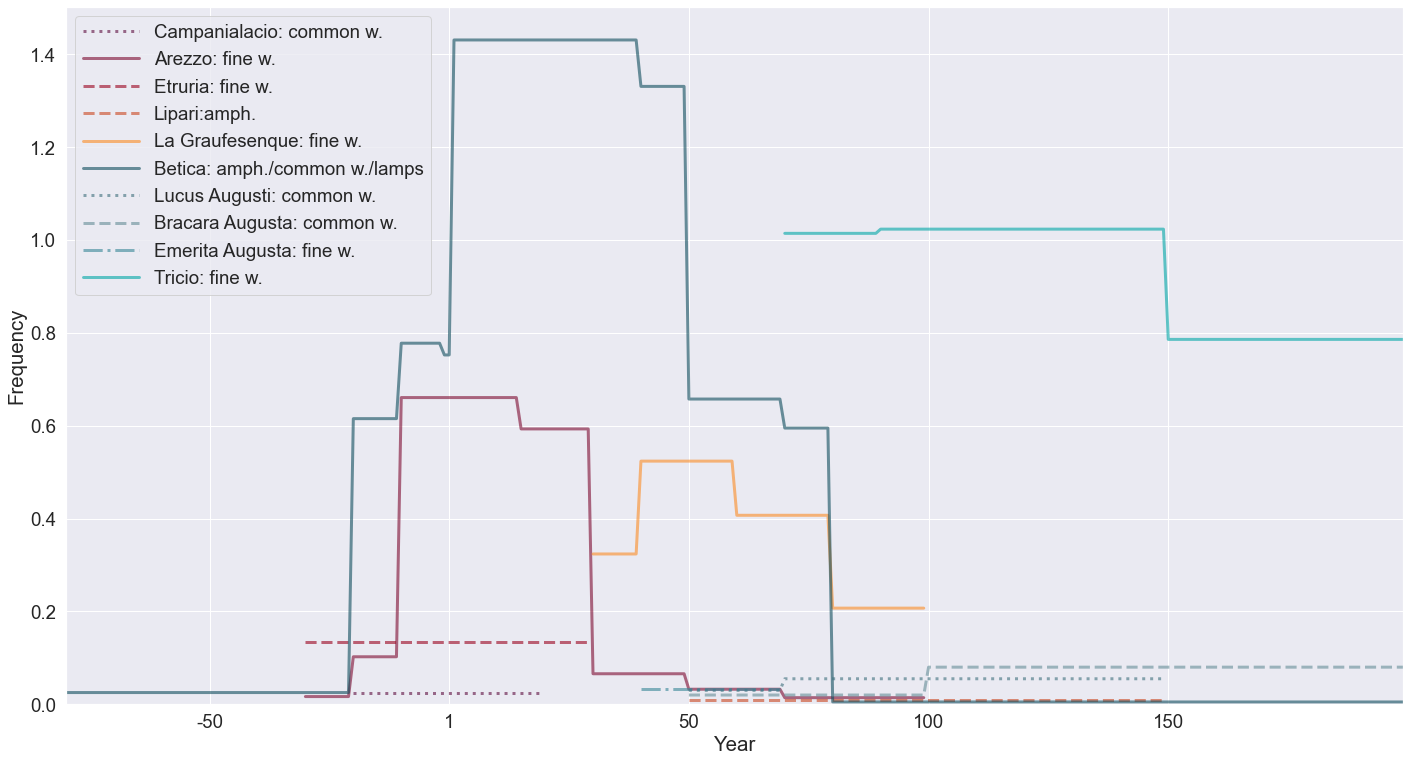

In [163]:
sns.set(font_scale=1.7)



fig, ax = plt.subplots(figsize=(20, 11))

#Calculate minimum and maximum Y values to define the cuff off further
minimum, maximum = get_Y_range(df_dictionary)

plot_graph(dicts_of_df = df_dictionary,
           palette=['#5F0F40','#7D092F','#9A031E','#CB4721','#FB8B24','#0F4C5C', '#3f707d', '#658d97', '#388697','#00a6a6'],  
           ax = ax,
          alpha= 0.6)
           
#Change the style of a specific line            
ax.lines[0].set_linestyle(":") 
ax.lines[1].set_linestyle("-") 
ax.lines[2].set_linestyle("--")
ax.lines[3].set_linestyle("--") 
ax.lines[4].set_linestyle("-")
ax.lines[5].set_linestyle("-") 
ax.lines[6].set_linestyle(":") 
ax.lines[7].set_linestyle("--") 
ax.lines[8].set_linestyle("-.") 
ax.lines[9].set_linestyle("-") 


# Cut off the range of Y value shown 
ax.set_xlim(minimum, maximum)

# Remove 0 from Y axis
ax.set_ylim(0, None)



ax.set_ylabel("Frequency")
ax.set_xlabel("Year")

#To hide values on axis
#ax.axes.xaxis.set_ticks([])
#ax.axes.yaxis.set_ticks([])

# Make sure that if 0 is included on the x-axis it is turned into 1 instead
ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])

#to change the legend
plt.legend(handlelength=3)


plt.tight_layout()


# Save the graph
plt.savefig('./Fig9.png')

### 9. Frequency of non-local products per site (Fig. 10)

#### 9.1 Calculate *forma* frequency per year
The next chunks illustrate how to calculate the summed frequcy per year. One should specify frequency value in `sum_freq` argument (tni or mni).

The `sum_freq_per_year` can be used for any number of frequency values. Each run creates a new column in the existing dataframe. The name of the column can be specified with parameter `freq_per_year`. 

In [164]:
df1 = sum_freq_per_year(df0,
                        sum_freq = 'tni',
                        lower_date = 'start_date',
                        upper_date = 'end_date',
                        freq_per_year = 'sum_freq_per_year_tni')
df1.head()

,origin_h1,origin_h2,form,start_date,end_date,site,tni,mni,sum_freq_per_year_tni,sum_freq_per_year_mni
0,gaul,lagraufesenque,drag. 15/17,30.0,60.0,armea,3.0,2.0,0.100000,0.066667
1,gaul,lagraufesenque,drag. 15/17,30.0,60.0,castromao,1.0,1.0,0.033333,0.033333
2,gaul,lagraufesenque,drag. 18/31,30.0,60.0,armea,1.0,1.0,0.033333,0.033333
3,gaul,lagraufesenque,drag. 27,40.0,80.0,armea,7.0,6.0,0.175000,0.150000
4,gaul,lagraufesenque,drag. 27,40.0,80.0,castromao,1.0,1.0,0.025000,0.025000


In [165]:
df1 = sum_freq_per_year(df0,
                        sum_freq = 'mni',
                        lower_date = 'start_date',
                        upper_date = 'end_date',
                        freq_per_year = 'sum_freq_per_year_mni')
df1.head()

,origin_h1,origin_h2,form,start_date,end_date,site,tni,mni,sum_freq_per_year_tni,sum_freq_per_year_mni
0,gaul,lagraufesenque,drag. 15/17,30.0,60.0,armea,3.0,2.0,0.100000,0.066667
1,gaul,lagraufesenque,drag. 15/17,30.0,60.0,castromao,1.0,1.0,0.033333,0.033333
2,gaul,lagraufesenque,drag. 18/31,30.0,60.0,armea,1.0,1.0,0.033333,0.033333
3,gaul,lagraufesenque,drag. 27,40.0,80.0,armea,7.0,6.0,0.175000,0.150000
4,gaul,lagraufesenque,drag. 27,40.0,80.0,castromao,1.0,1.0,0.025000,0.025000


In [166]:
##Non-local goods per site_Laias
#Fig 10a

freq_df_laias = year_freq_df(df1[(df1['origin_h2'] != 'local') & (df1['site'] == 'laias')],
                    lower_date = 'start_date',
                    upper_date = 'end_date',
                    sum_freq = 'sum_freq_per_year_mni')

In [167]:
df_dictionary10 = {'Laias': freq_df_laias}

C:\Users\alba_\AppData\Local\Temp/ipykernel_20104/1111453901.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


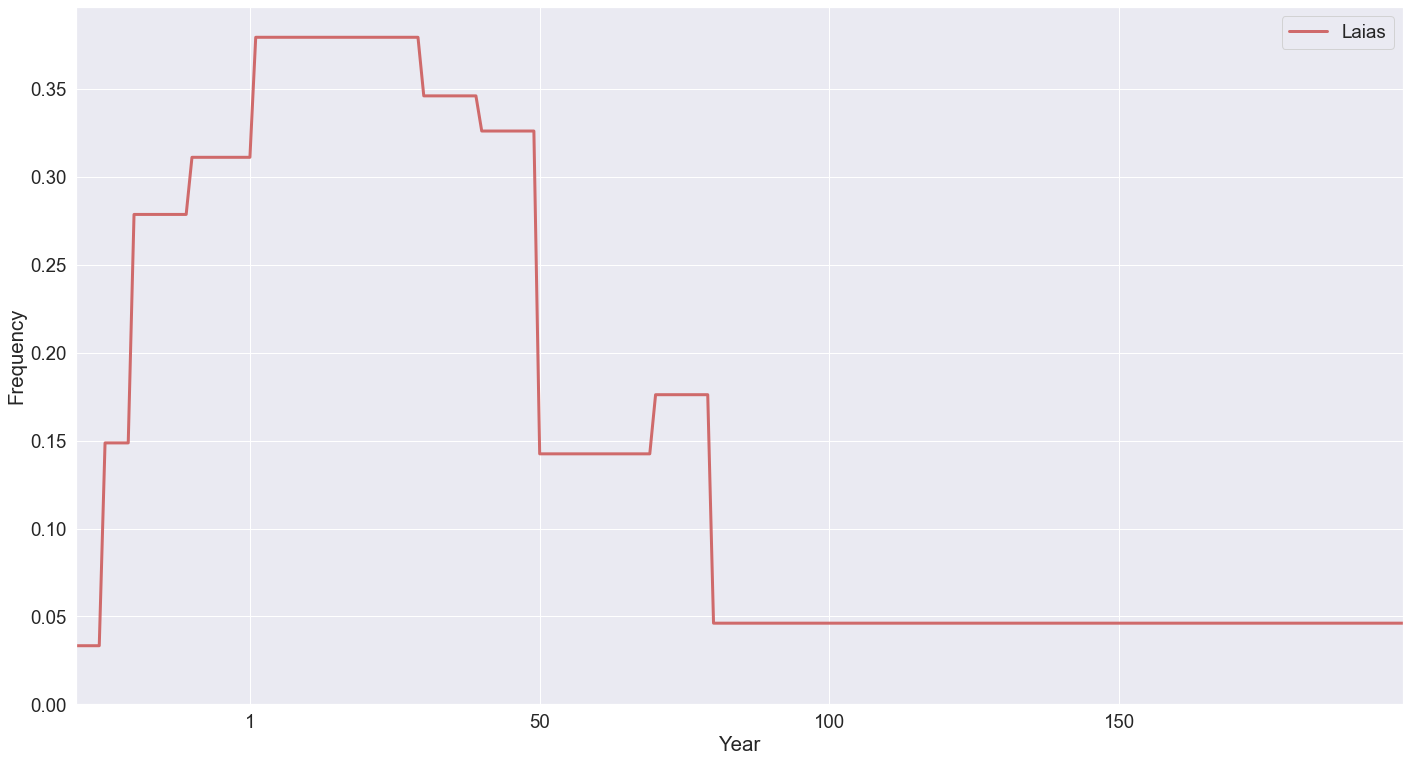

In [168]:
sns.set(font_scale=1.7)


fig, ax = plt.subplots(figsize=(20, 11))

#Calculate minimum and maximum Y values to define the cuff off further
minimum, maximum = get_Y_range(df_dictionary10)

plot_graph(dicts_of_df = df_dictionary10,
           palette=['indianred'],  
           linestyle = 'solid',
           ax = ax)
           

# Cut off the range of Y value shown 
ax.set_xlim(minimum, maximum)

# Remove 0 from Y axis
ax.set_ylim(0, None)


#Change Y values format 
# integers = '%.0f'
# decimals = '%.1f', the number before 'f' defines how many values to show after dot
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))  

ax.set_ylabel("Frequency")
ax.set_xlabel("Year")

#To hide values on axis
#ax.axes.xaxis.set_ticks([])
#ax.axes.yaxis.set_ticks([])

# Make sure that if 0 is included on the x-axis it is turned into 1 instead
ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


plt.tight_layout()


# Save the graph
plt.savefig('./Fig10a.png')

In [169]:
##Non-local goods per site_Las
#Fig 10b

freq_df_las = year_freq_df(df1[(df1['origin_h2'] != 'local') & (df1['site'] == 'san cibran de las')],
                    lower_date = 'start_date',
                    upper_date = 'end_date',
                    sum_freq = 'sum_freq_per_year_mni')

In [170]:
df_dictionary11 = {'San Cibran': freq_df_las}

C:\Users\alba_\AppData\Local\Temp/ipykernel_20104/3081613354.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


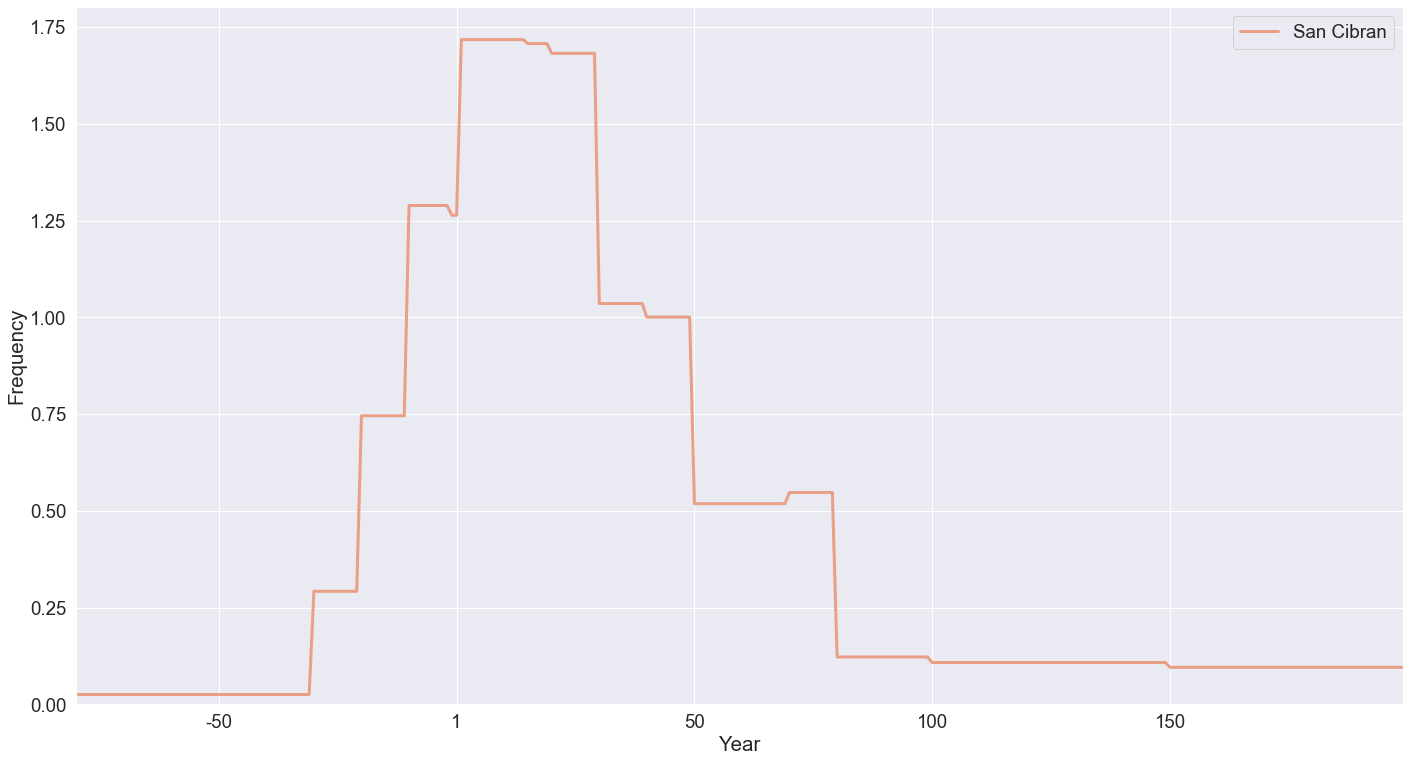

In [171]:
sns.set(font_scale=1.7)


fig, ax = plt.subplots(figsize=(20, 11))

#Calculate minimum and maximum Y values to define the cuff off further
minimum, maximum = get_Y_range(df_dictionary11)

plot_graph(dicts_of_df = df_dictionary11,
           palette=['darksalmon'],  
           linestyle = 'solid',
           ax = ax)
           

# Cut off the range of Y value shown 
ax.set_xlim(minimum, maximum)

# Remove 0 from Y axis
ax.set_ylim(0, None)


#Change Y values format 
# integers = '%.0f'
# decimals = '%.1f', the number before 'f' defines how many values to show after dot
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))  

ax.set_ylabel("Frequency")
ax.set_xlabel("Year")

#To hide values on axis
#ax.axes.xaxis.set_ticks([])
#ax.axes.yaxis.set_ticks([])

# Make sure that if 0 is included on the x-axis it is turned into 1 instead
ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


plt.tight_layout()


# Save the graph
plt.savefig('./Fig10b.png')

In [172]:
##Non-local goods per site_Castromao
#Fig 10c

freq_df_castromao = year_freq_df(df1[(df1['origin_h2'] != 'local') & (df1['site'] == 'castromao')],
                    lower_date = 'start_date',
                    upper_date = 'end_date',
                    sum_freq = 'sum_freq_per_year_mni')

In [173]:
df_dictionary12 = {'Castromao': freq_df_castromao}

C:\Users\alba_\AppData\Local\Temp/ipykernel_20104/970721596.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


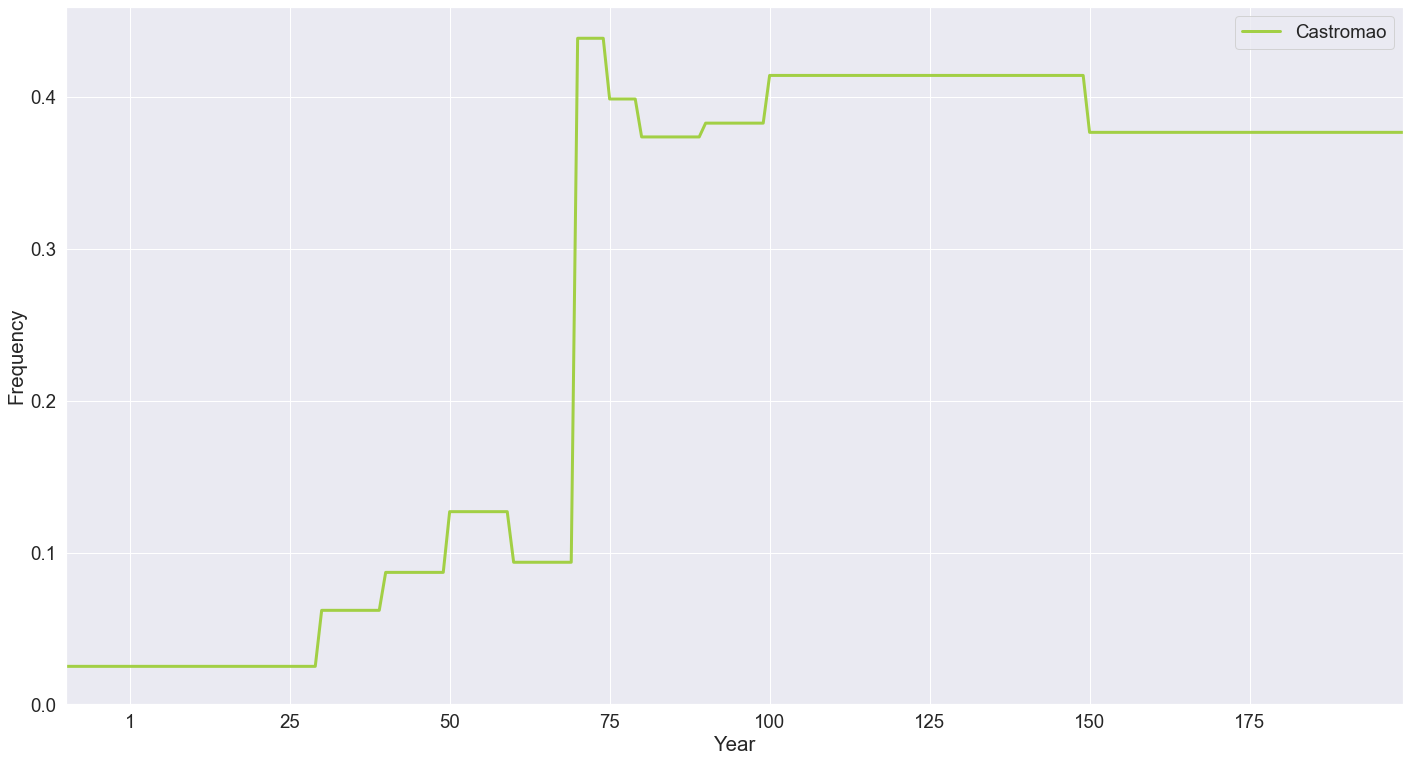

In [174]:
sns.set(font_scale=1.7)


fig, ax = plt.subplots(figsize=(20, 11))

#Calculate minimum and maximum Y values to define the cuff off further
minimum, maximum = get_Y_range(df_dictionary12)

plot_graph(dicts_of_df = df_dictionary12,
           palette=['yellowgreen'],  
           linestyle = 'solid',
           ax = ax)
           

# Cut off the range of Y value shown 
ax.set_xlim(minimum, maximum)

# Remove 0 from Y axis
ax.set_ylim(0, None)


#Change Y values format 
# integers = '%.0f'
# decimals = '%.1f', the number before 'f' defines how many values to show after dot
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))  

ax.set_ylabel("Frequency")
ax.set_xlabel("Year")

#To hide values on axis
#ax.axes.xaxis.set_ticks([])
#ax.axes.yaxis.set_ticks([])

# Make sure that if 0 is included on the x-axis it is turned into 1 instead
ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


plt.tight_layout()


# Save the graph
plt.savefig('./Fig10c.png')

In [175]:
##Non-local goods per site_Armea
#Fig 10d

freq_df_armea = year_freq_df(df1[(df1['origin_h2'] != 'local') & (df1['site'] == 'armea')],
                    lower_date = 'start_date',
                    upper_date = 'end_date',
                    sum_freq = 'sum_freq_per_year_mni')

In [176]:
df_dictionary13 = {'Armea': freq_df_armea}

C:\Users\alba_\AppData\Local\Temp/ipykernel_20104/3909880419.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


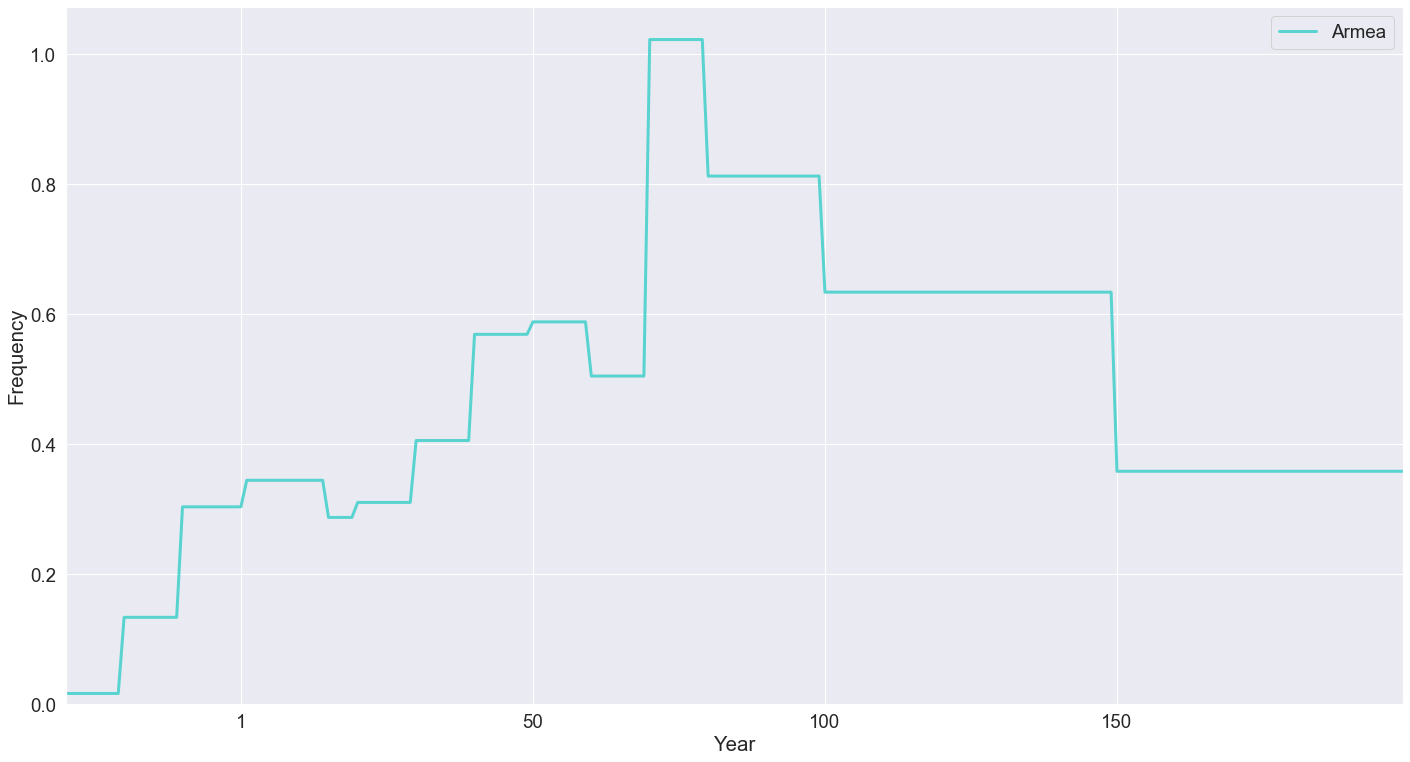

In [177]:
sns.set(font_scale=1.7)


fig, ax = plt.subplots(figsize=(20, 11))

#Calculate minimum and maximum Y values to define the cuff off further
minimum, maximum = get_Y_range(df_dictionary13)

plot_graph(dicts_of_df = df_dictionary13,
           palette=['mediumturquoise'],  
           linestyle = 'solid',
           ax = ax)
           

# Cut off the range of Y value shown 
ax.set_xlim(minimum, maximum)

# Remove 0 from Y axis
ax.set_ylim(0, None)


#Change Y values format 
# integers = '%.0f'
# decimals = '%.1f', the number before 'f' defines how many values to show after dot
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))  

ax.set_ylabel("Frequency")
ax.set_xlabel("Year")

#To hide values on axis
#ax.axes.xaxis.set_ticks([])
#ax.axes.yaxis.set_ticks([])

# Make sure that if 0 is included on the x-axis it is turned into 1 instead
ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


plt.tight_layout()


# Save the graph
plt.savefig('./Fig10d.png')

C:\Users\alba_\AppData\Local\Temp/ipykernel_20104/3784417254.py:74: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([int(i) if i != 0 else 1 for i in ax1.get_xticks()])
C:\Users\alba_\AppData\Local\Temp/ipykernel_20104/3784417254.py:77: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([int(i) if i != 0 else 1 for i in ax2.get_xticks()])


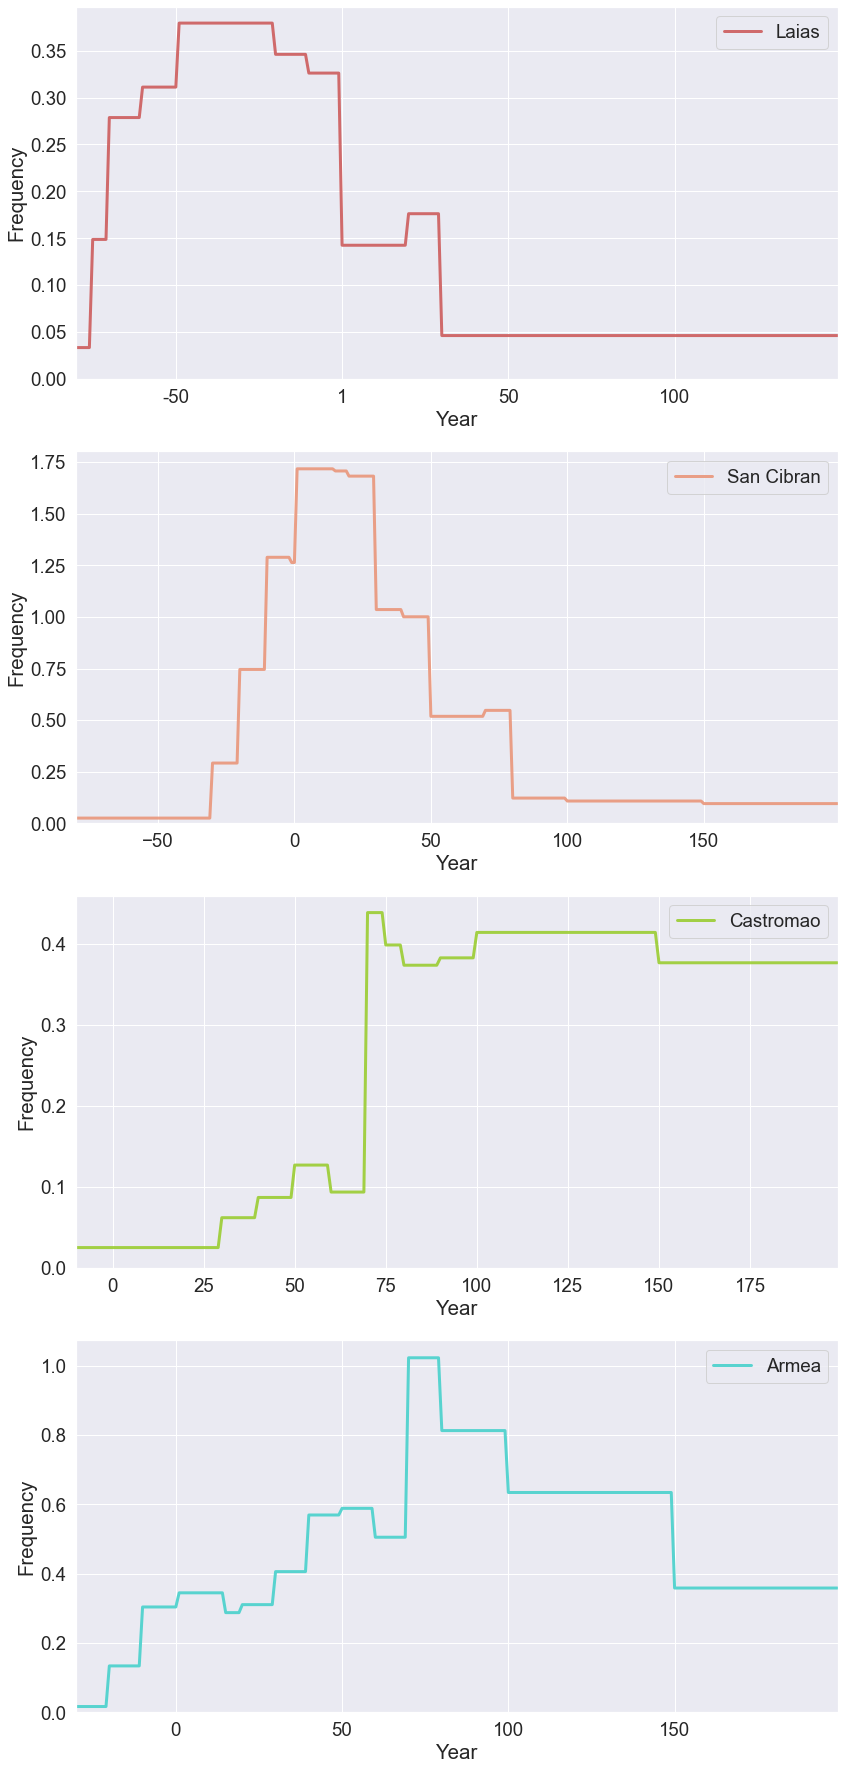

In [178]:
#Non-local products per site (all sites)
#Fig.10

sns.set(font_scale=1.7)

fig, (ax1, ax2, ax3, ax4)= plt.subplots(nrows=4, ncols=1, figsize=(12, 25))

#Calculate minimum and maximum Y values 
minimum1, maximum1 = get_Y_range(df_dictionary10)
minimum2, maximum2 = get_Y_range(df_dictionary11)
minimum3, maximum3 = get_Y_range(df_dictionary12)
minimum4, maximum4 = get_Y_range(df_dictionary13)

plot_graph(dicts_of_df = df_dictionary10,
           palette=['indianred'],
           linestyle = 'solid',
           ax = ax1)
           

plot_graph(dicts_of_df = df_dictionary11,
            palette=['darksalmon'],
            linestyle = 'solid',
            ax = ax2)

plot_graph(dicts_of_df = df_dictionary12,
           palette=['yellowgreen'],
           linestyle = 'solid',
           ax = ax3)
           

plot_graph(dicts_of_df = df_dictionary13,
            palette=['mediumturquoise'],
            linestyle = 'solid',
            ax = ax4)

# Cut off the range of Y value shown 
ax1.set_xlim(minimum1, maximum1)
ax2.set_xlim(minimum2, maximum2)
ax3.set_xlim(minimum3, maximum3)
ax4.set_xlim(minimum4, maximum4)

# Remove 0 from Y axis
ax1.set_ylim(0, None)
ax2.set_ylim(0, None)
ax3.set_ylim(0, None)
ax4.set_ylim(0, None)

#Change Y values format 
# integers = '%.0f'
# decimals = '%.1f', the number before 'f' defines how many values to show after dot
#ax1.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))  
#ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

ax1.set_ylabel("Frequency")
ax1.set_xlabel("Year")

ax2.set_ylabel("Frequency")
ax2.set_xlabel("Year")

ax3.set_ylabel("Frequency")
ax3.set_xlabel("Year")

ax4.set_ylabel("Frequency")
ax4.set_xlabel("Year")

#To hide values on axis
#ax1.axes.xaxis.set_ticks([])
#ax1.axes.yaxis.set_ticks([])
#ax2.axes.xaxis.set_ticks([])
#ax2.axes.yaxis.set_ticks([])


# Make sure that if 0 is included on the x-axis it is turned into 1 instead
ax1.set_xticklabels([int(i) if i != 0 else 1 for i in ax1.get_xticks()])


ax1.set_xticklabels([int(i) if i != 0 else 1 for i in ax2.get_xticks()])

plt.tight_layout()


# Save the graph
plt.savefig('./fig10.png')

### 10. Show count of unique *Forma Types*  per *Year*  per *Origin_h2* per *Site* in *Forma* date range (Fig. 11)

#### 10.1 Identify the list of *forma types* per *origin_h2* for a *site* in *forma* date range. Save *forms* in a list.


In [179]:
df0 = data.groupby(['site', 'start_date', 'end_date', 'origin_h1', 'origin_h2'])['form'].apply(lambda x: ','.join(x))
data = data[data['form'] != 'indeterminada'] 
df0 = df0.apply(lambda x: x.split(','))
df0 = df0.reset_index()
df0 = df0.rename(columns = {'form':'List_of_formtypes'})
df0.head()

,site,start_date,end_date,origin_h1,origin_h2,List_of_formtypes
0,armea,-50.0,50.0,iberianpeninsula,local,[fuente]
1,armea,-30.0,30.0,italy,arezzo,[consp. b.3.13.]
2,armea,-30.0,50.0,iberianpeninsula,local,"[tinaja, tinaja, tinaja, tinaja, tinaja, tinaj..."
3,armea,-30.0,200.0,iberianpeninsula,local,"[olla, olla, olla, olla, olla, olla, tapadera,..."
4,armea,-20.0,15.0,italy,arezzo,"[consp. 22.1.3., consp. b.1.5.]"


#### 10.2 Count the number of unique *forma types*

In [180]:
##Producciones locales en todos los yacimientos 
#Figure 11
count_total = year_object_count_df(df0[(df0['origin_h2'] == 'local')],
                                   lower_date = 'start_date',  
                                   upper_date = 'end_date',
                                   object_list = 'List_of_formtypes') 

In [181]:
df_dictionary = {'Local Productions': count_total}

C:\Users\alba_\AppData\Local\Temp/ipykernel_20104/2679607399.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


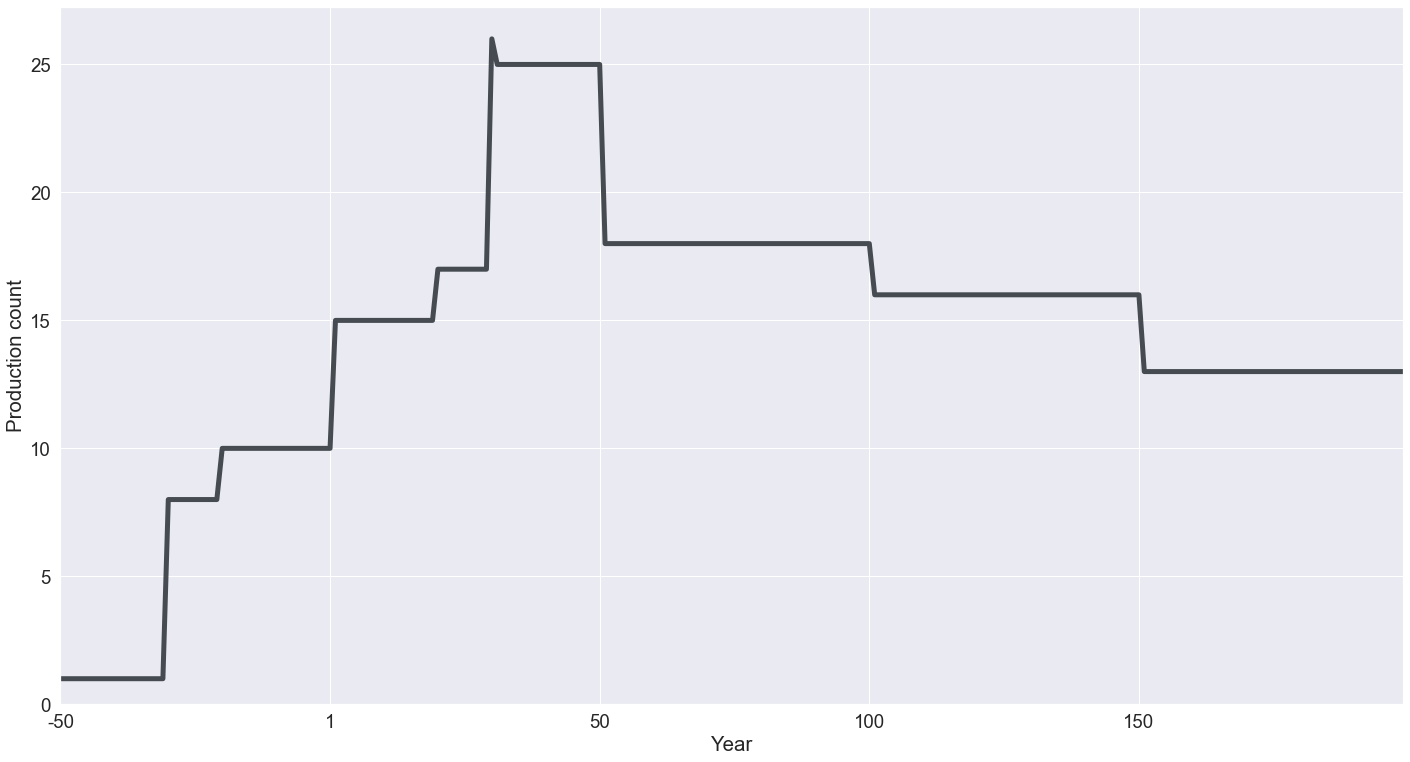

In [182]:
sns.set(font_scale=1.7)



fig, ax = plt.subplots(figsize=(20, 11))

#Calculate minimum and maximum Y values to define the cuff off further
minimum, maximum = get_Y_range(df_dictionary)

plot_graph(dicts_of_df = df_dictionary,
           palette=['#343a40'], 
           linewidth= 5,
           ax = ax, 
          alpha = 0.9)
           
#Change the style of a specific line            
ax.lines[0].set_linestyle("-") 



# Cut off the range of Y value shown 
ax.set_xlim(minimum, maximum)

# Remove 0 from Y axis
ax.set_ylim(0, None)





ax.set_ylabel("Production count")
ax.set_xlabel("Year")

#To hide values on axis
#ax.axes.xaxis.set_ticks([])
#ax.axes.yaxis.set_ticks([])

# Make sure that if 0 is included on the x-axis it is turned into 1 instead
ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])



#Remove legend
ax.get_legend().remove() 

plt.tight_layout()


# Save the graph
plt.savefig('./Fig11.png')

### 11. Frequency of types per trafition (Fig. 12)

#### 11.1 To begin with the summed frequency is found

In [183]:
df0 = data.groupby(['form_h2', 'origin_h2', 'form', 'site', 'start_date', 'end_date'])['tni', 'mni'].apply(lambda x : x.sum())
df0 = df0.reset_index()
df0.head()

C:\Users\alba_\AppData\Local\Temp/ipykernel_20104/882883309.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df0 = data.groupby(['form_h2', 'origin_h2', 'form', 'site', 'start_date', 'end_date'])['tni', 'mni'].apply(lambda x : x.sum())


,form_h2,origin_h2,form,site,start_date,end_date,tni,mni
0,bol,lagraufesenque,drag. 29,armea,30.0,100.0,1.0,1.0
1,bol,lagraufesenque,drag. 29,castromao,30.0,100.0,1.0,1.0
2,bol,lagraufesenque,drag. 35,armea,60.0,100.0,1.0,1.0
3,bol,lagraufesenque,drag. 36,armea,60.0,100.0,1.0,1.0
4,bol,lagraufesenque,ritt. 8,armea,30.0,100.0,1.0,1.0


#### 11.2 Calculate the summed frequency per year

In [184]:
df1 = sum_freq_per_year(df0,
                        sum_freq = 'tni',
                        lower_date = 'start_date',
                        upper_date = 'end_date',
                        freq_per_year = 'sum_freq_per_year_tni')

In [185]:
df1 = sum_freq_per_year(df0,
                        sum_freq = 'mni',
                        lower_date = 'start_date',
                        upper_date = 'end_date',
                        freq_per_year = 'sum_freq_per_year_mni')

df1.head()

,form_h2,origin_h2,form,site,start_date,end_date,tni,mni,sum_freq_per_year_tni,sum_freq_per_year_mni
0,bol,lagraufesenque,drag. 29,armea,30.0,100.0,1.0,1.0,0.014286,0.014286
1,bol,lagraufesenque,drag. 29,castromao,30.0,100.0,1.0,1.0,0.014286,0.014286
2,bol,lagraufesenque,drag. 35,armea,60.0,100.0,1.0,1.0,0.025000,0.025000
3,bol,lagraufesenque,drag. 36,armea,60.0,100.0,1.0,1.0,0.025000,0.025000
4,bol,lagraufesenque,ritt. 8,armea,30.0,100.0,1.0,1.0,0.014286,0.014286


#### 11.3 Create frequency dataframe with information about a certain forma_h2

In [187]:
##Frequency per tradition

freq_ironage = year_freq_df(df1[df1['form_h2'] == 'iron age'],     
                            lower_date = 'start_date',
                            upper_date = 'end_date',
                            sum_freq = 'sum_freq_per_year_mni')   

freq_roman = year_freq_df(df1[df1['form_h2'] == 'roman inspired'],     
                          lower_date = 'start_date',
                          upper_date = 'end_date',
                          sum_freq = 'sum_freq_per_year_mni')   

freq_both = year_freq_df(df1[df1['form_h2'] == 'both'],     
                          lower_date = 'start_date',
                          upper_date = 'end_date',
                          sum_freq = 'sum_freq_per_year_mni')

In [188]:
df_dictionary = {'Iron Age': freq_ironage, 'Unassigned': freq_both, 'Roman Inspired': freq_roman}

C:\Users\alba_\AppData\Local\Temp/ipykernel_20104/3012095653.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


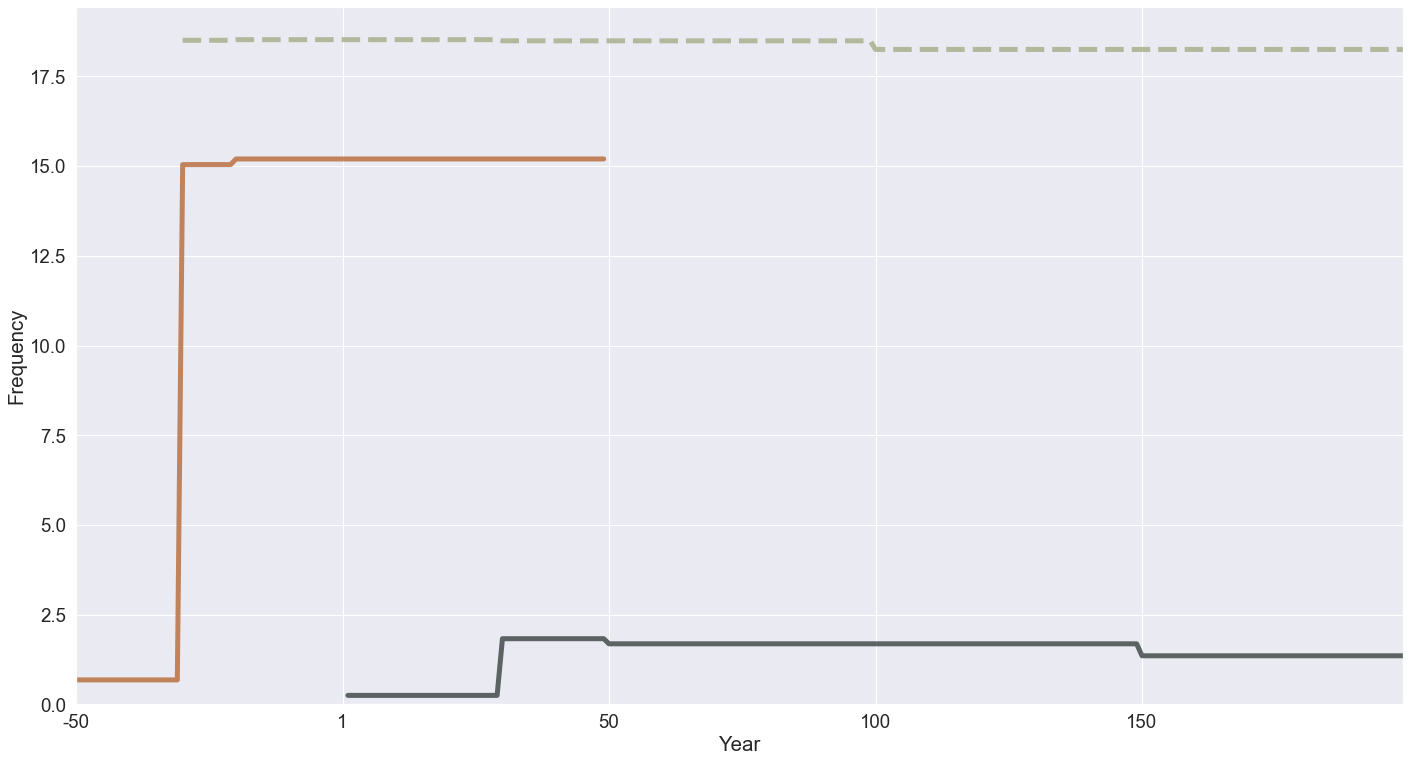

In [189]:
sns.set(font_scale=1.7)



fig, ax = plt.subplots(figsize=(20, 11))

#Calculate minimum and maximum Y values to define the cuff off further
minimum, maximum = get_Y_range(df_dictionary)

plot_graph(dicts_of_df = df_dictionary,
           palette=['#B76935','#a4ac86','#38413F'],  
           ax = ax,
           linewidth= 5,
          alpha= 0.8)
           
#Change the style of a specific line            
ax.lines[0].set_linestyle("-") 
ax.lines[1].set_linestyle("--") 
ax.lines[2].set_linestyle("-")



# Cut off the range of Y value shown 
ax.set_xlim(minimum, maximum)

# Remove 0 from Y axis
ax.set_ylim(0, None)



ax.set_ylabel("Frequency")
ax.set_xlabel("Year")

#To hide values on axis
#ax.axes.xaxis.set_ticks([])
#ax.axes.yaxis.set_ticks([])

# Make sure that if 0 is included on the x-axis it is turned into 1 instead
ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])

#Remove legend
ax.get_legend().remove()


plt.tight_layout()


# Save the graph
plt.savefig('./Fig12.png')

### 12. TSH per site (Fig. 13)

#### 12.1 Identify the list of *forma types* per *origin_h2* for a *site* in *forma* date range. Save *forms* in a list.


In [190]:
df0 = data.groupby(['site', 'start_date', 'end_date', 'origin_h1', 'origin_h2'])['form'].apply(lambda x: ','.join(x))
data = data[data['form'] != 'indeterminada'] 
df0 = df0.apply(lambda x: x.split(','))
df0 = df0.reset_index()
df0 = df0.rename(columns = {'form':'List_of_formtypes'})
df0.head()

,site,start_date,end_date,origin_h1,origin_h2,List_of_formtypes
0,armea,-50.0,50.0,iberianpeninsula,local,[fuente]
1,armea,-30.0,30.0,italy,arezzo,[consp. b.3.13.]
2,armea,-30.0,50.0,iberianpeninsula,local,"[tinaja, tinaja, tinaja, tinaja, tinaja, tinaj..."
3,armea,-30.0,200.0,iberianpeninsula,local,"[olla, olla, olla, olla, olla, olla, tapadera,..."
4,armea,-20.0,15.0,italy,arezzo,"[consp. 22.1.3., consp. b.1.5.]"


In [191]:
##Producciones locales en todos los yacimientos 
#Figure 13

count_las = year_object_count_df(df0[(df0['origin_h2'] == 'tricio') & (df0['site'] == 'san cibran de las')],
                                   lower_date = 'start_date',  
                                   upper_date = 'end_date',
                                   object_list = 'List_of_formtypes') 

count_laias = year_object_count_df(df0[(df0['origin_h2'] == 'tricio') & (df0['site'] == 'laias')],
                                   lower_date = 'start_date',  
                                   upper_date = 'end_date',
                                   object_list = 'List_of_formtypes') 

count_castromao = year_object_count_df(df0[(df0['origin_h2'] == 'tricio') & (df0['site'] == 'castromao')],
                                   lower_date = 'start_date',  
                                   upper_date = 'end_date',
                                   object_list = 'List_of_formtypes') 

count_armea = year_object_count_df(df0[(df0['origin_h2'] == 'tricio') & (df0['site'] == 'armea')],
                                   lower_date = 'start_date',  
                                   upper_date = 'end_date',
                                   object_list = 'List_of_formtypes') 

In [192]:
df_dictionary = {'San Cibran de Las': count_las, 'Laias': count_laias, 'Castromao' : count_castromao , 'Armea' : count_armea}

C:\Users\alba_\AppData\Local\Temp/ipykernel_20104/4273607625.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


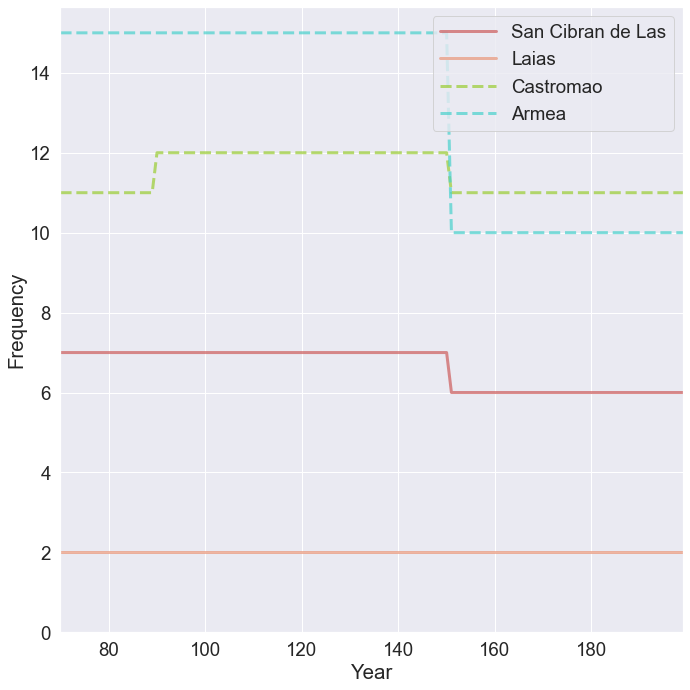

In [193]:
sns.set(font_scale=1.7)



fig, ax = plt.subplots(figsize=(10, 10))

#Calculate minimum and maximum Y values to define the cuff off further
minimum, maximum = get_Y_range(df_dictionary)

plot_graph(dicts_of_df = df_dictionary,
           palette=['indianred','darksalmon','yellowgreen', 'mediumturquoise'],  
           ax = ax,
          alpha= 0.7)
           
#Change the style of a specific line            
ax.lines[0].set_linestyle("-") 
ax.lines[1].set_linestyle("-") 
ax.lines[2].set_linestyle("--")
ax.lines[3].set_linestyle("--")


# Cut off the range of Y value shown 
ax.set_xlim(minimum, maximum)

# Remove 0 from Y axis
ax.set_ylim(0, None)



ax.set_ylabel("Frequency")
ax.set_xlabel("Year")

#To hide values on axis
#ax.axes.xaxis.set_ticks([])
#ax.axes.yaxis.set_ticks([])

# Make sure that if 0 is included on the x-axis it is turned into 1 instead
ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])

#to change the legend
plt.legend(handlelength=3)


plt.tight_layout()


# Save the graph
plt.savefig('./Fig13.png')

### 13. Roman inspired local forms per site (Fig. 14)

#### 13.1 To begin with the summed frequency is found

In [194]:
df0 = data.groupby(['form_h2', 'origin_h2', 'form', 'site', 'start_date', 'end_date'])['tni', 'mni'].apply(lambda x : x.sum())
df0 = df0.reset_index()
df0.head()

C:\Users\alba_\AppData\Local\Temp/ipykernel_20104/882883309.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df0 = data.groupby(['form_h2', 'origin_h2', 'form', 'site', 'start_date', 'end_date'])['tni', 'mni'].apply(lambda x : x.sum())


,form_h2,origin_h2,form,site,start_date,end_date,tni,mni
0,bol,lagraufesenque,drag. 29,armea,30.0,100.0,1.0,1.0
1,bol,lagraufesenque,drag. 29,castromao,30.0,100.0,1.0,1.0
2,bol,lagraufesenque,drag. 35,armea,60.0,100.0,1.0,1.0
3,bol,lagraufesenque,drag. 36,armea,60.0,100.0,1.0,1.0
4,bol,lagraufesenque,ritt. 8,armea,30.0,100.0,1.0,1.0


#### 13.2 Calculate the summed frequency per year

In [195]:
## Result_7_ roman inspired forms per site
#Figure 14

freq_roman_laias = year_freq_df(df1[(df1['form_h2'] == 'roman inspired') & (df1['origin_h2'] == 'local') & (df1['site'] == 'laias')],
                          lower_date = 'start_date',
                          upper_date = 'end_date',
                          sum_freq = 'sum_freq_per_year_mni') 

freq_roman_las = year_freq_df(df1[(df1['form_h2'] == 'roman inspired') & (df1['origin_h2'] == 'local') & (df1['site'] == 'san cibran de las')],
                          lower_date = 'start_date',
                          upper_date = 'end_date',
                          sum_freq = 'sum_freq_per_year_mni') 

freq_roman_castromao = year_freq_df(df1[(df1['form_h2'] == 'roman inspired') & (df1['origin_h2'] == 'local') & (df1['site'] == 'castromao')],
                          lower_date = 'start_date',
                          upper_date = 'end_date',
                          sum_freq = 'sum_freq_per_year_mni')

freq_roman_armea = year_freq_df(df1[(df1['form_h2'] == 'roman inspired')  & (df1['origin_h2'] == 'local') & (df1['site'] == 'armea')],
                          lower_date = 'start_date',
                          upper_date = 'end_date',
                          sum_freq = 'sum_freq_per_year_mni') 

In [196]:
df_dictionary ={'Laias': freq_roman_laias, 'San Cibran de Las': freq_roman_las, 'Castromao': freq_roman_castromao, 'Armea': freq_roman_armea}

C:\Users\alba_\AppData\Local\Temp/ipykernel_20104/3269120673.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


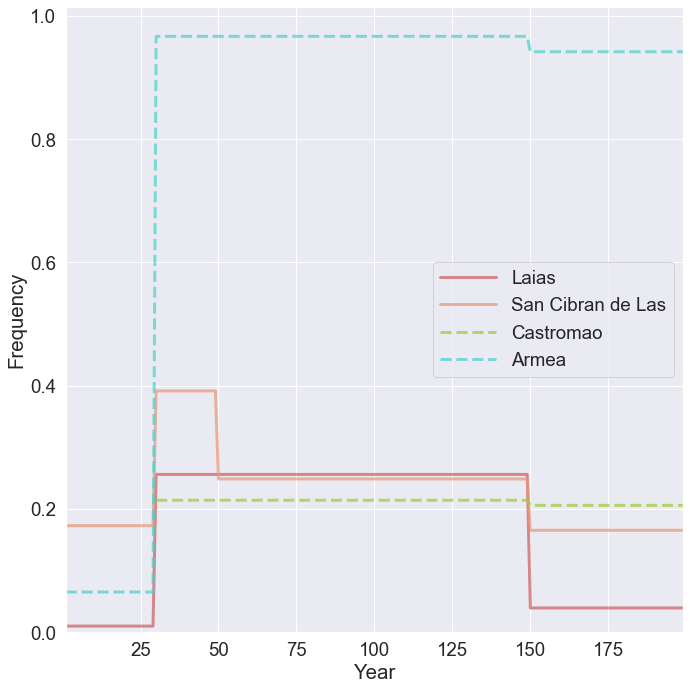

In [197]:
sns.set(font_scale=1.7)



fig, ax = plt.subplots(figsize=(10, 10))

#Calculate minimum and maximum Y values to define the cuff off further
minimum, maximum = get_Y_range(df_dictionary)

plot_graph(dicts_of_df = df_dictionary,
           palette=['indianred','darksalmon','yellowgreen', 'mediumturquoise'],  
           ax = ax,
          alpha= 0.7)
           
#Change the style of a specific line            
ax.lines[0].set_linestyle("-") 
ax.lines[1].set_linestyle("-") 
ax.lines[2].set_linestyle("--")
ax.lines[3].set_linestyle("--")


# Cut off the range of Y value shown 
ax.set_xlim(minimum, maximum)

# Remove 0 from Y axis
ax.set_ylim(0, None)



ax.set_ylabel("Frequency")
ax.set_xlabel("Year")

#To hide values on axis
#ax.axes.xaxis.set_ticks([])
#ax.axes.yaxis.set_ticks([])

# Make sure that if 0 is included on the x-axis it is turned into 1 instead
ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])

#to change the legend
plt.legend(handlelength=3)


plt.tight_layout()


# Save the graph
plt.savefig('./Fig14.png')

### 14. Total non-local MNI in all sites (Fig. 15)

### 14.1 Group forma by origin_h2 and sum frequencies
Specify if you want the frequency mni or tni in the below chunk

In [243]:
df0 = data.groupby(['origin_h1','origin_h2', 'form', 'start_date', 'end_date', 'site'])['tni', 'mni'].apply(lambda x : x.sum())
df0 = df0.reset_index()
df0.head()


C:\Users\alba_\AppData\Local\Temp/ipykernel_20104/3726632747.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df0 = data.groupby(['origin_h1','origin_h2', 'form', 'start_date', 'end_date', 'site'])['tni', 'mni'].apply(lambda x : x.sum())


,origin_h1,origin_h2,form,start_date,end_date,site,tni,mni
0,gaul,lagraufesenque,drag. 15/17,30.0,60.0,armea,3.0,2.0
1,gaul,lagraufesenque,drag. 15/17,30.0,60.0,castromao,1.0,1.0
2,gaul,lagraufesenque,drag. 18/31,30.0,60.0,armea,1.0,1.0
3,gaul,lagraufesenque,drag. 27,40.0,80.0,armea,7.0,6.0
4,gaul,lagraufesenque,drag. 27,40.0,80.0,castromao,1.0,1.0


#### 14.2 Calculate *form* frequency per year

In [244]:
df1 = sum_freq_per_year(df0,
                        sum_freq = 'tni',
                        lower_date = 'start_date',
                        upper_date = 'end_date',
                        freq_per_year = 'sum_freq_per_year_tni')
df1.head()

,origin_h1,origin_h2,form,start_date,end_date,site,tni,mni,sum_freq_per_year_tni
0,gaul,lagraufesenque,drag. 15/17,30.0,60.0,armea,3.0,2.0,0.100000
1,gaul,lagraufesenque,drag. 15/17,30.0,60.0,castromao,1.0,1.0,0.033333
2,gaul,lagraufesenque,drag. 18/31,30.0,60.0,armea,1.0,1.0,0.033333
3,gaul,lagraufesenque,drag. 27,40.0,80.0,armea,7.0,6.0,0.175000
4,gaul,lagraufesenque,drag. 27,40.0,80.0,castromao,1.0,1.0,0.025000


In [245]:
df1 = sum_freq_per_year(df0,
                        sum_freq = 'mni',
                        lower_date = 'start_date',
                        upper_date = 'end_date',
                        freq_per_year = 'sum_freq_per_year_mni')
df1.head()

,origin_h1,origin_h2,form,start_date,end_date,site,tni,mni,sum_freq_per_year_tni,sum_freq_per_year_mni
0,gaul,lagraufesenque,drag. 15/17,30.0,60.0,armea,3.0,2.0,0.100000,0.066667
1,gaul,lagraufesenque,drag. 15/17,30.0,60.0,castromao,1.0,1.0,0.033333,0.033333
2,gaul,lagraufesenque,drag. 18/31,30.0,60.0,armea,1.0,1.0,0.033333,0.033333
3,gaul,lagraufesenque,drag. 27,40.0,80.0,armea,7.0,6.0,0.175000,0.150000
4,gaul,lagraufesenque,drag. 27,40.0,80.0,castromao,1.0,1.0,0.025000,0.025000


#### 14.3 Create a two-column dataframe with years and frequency values
This needs to be done for all levels of origin that should be included in the final plot. If for example, you want three different origins, three different frequency dataframes should be made. 


In [246]:
freq_import = year_freq_df(df1[(df1['origin_h1'] == 'iberianpeninsula') & (df1['origin_h2'] != 'local') | (df1['origin_h1'] == 'gaul') | (df1['origin_h1'] == 'italy')],    
                           lower_date = 'start_date',  
                            upper_date = 'end_date',
                            sum_freq = 'sum_freq_per_year_mni')

In [247]:
df_dictionary = {'Imported goods': freq_import}

C:\Users\alba_\AppData\Local\Temp/ipykernel_20104/3067641145.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


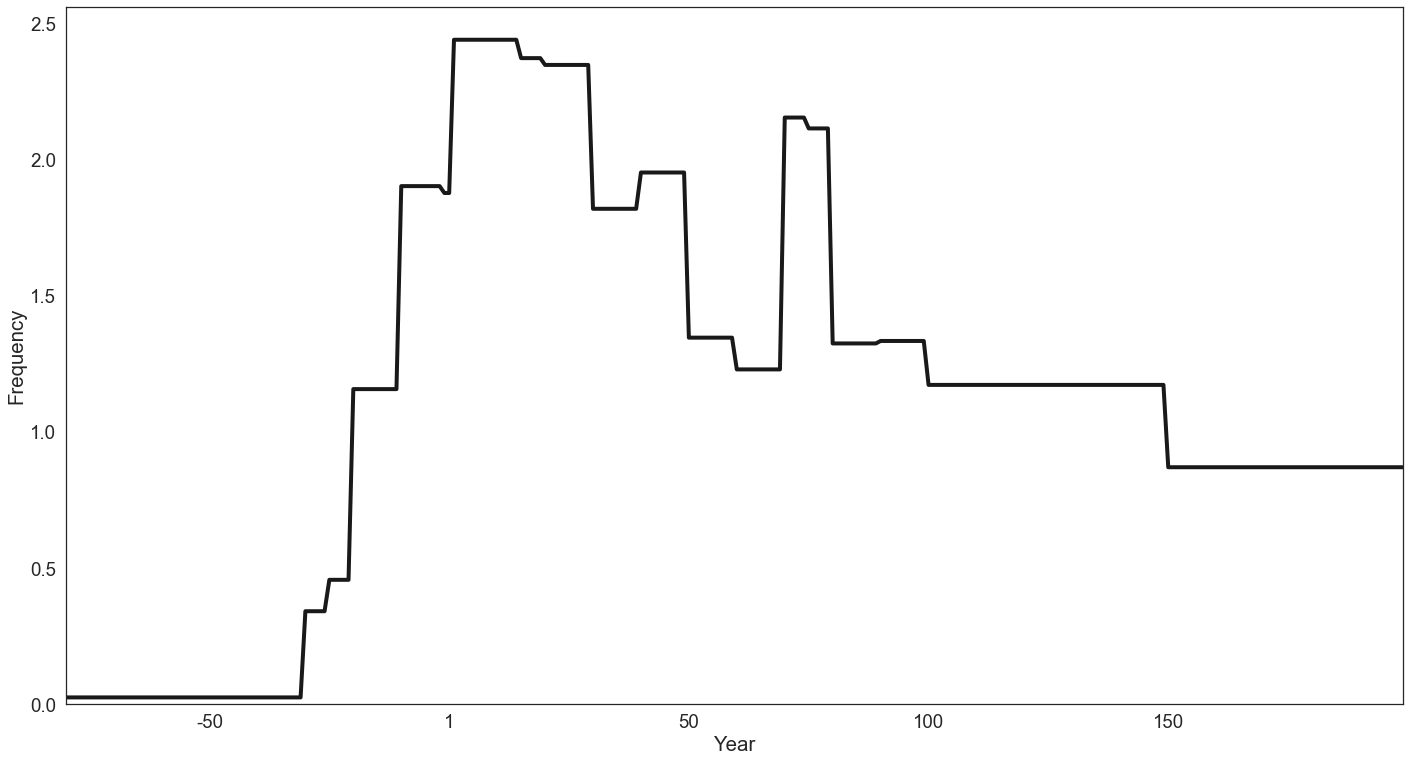

In [248]:
sns.set(font_scale=1.7)

#Remove squeres from background
sns.set_style(style='white')  

fig, ax = plt.subplots(figsize=(20, 11))

#Calculate minimum and maximum Y values to define the cuff off further
minimum, maximum = get_Y_range(df_dictionary)

plot_graph(dicts_of_df = df_dictionary,
           palette=['black'],  
           linestyle = 'solid',
           linewidth = '4',
           ax = ax)
           

# Cut off the range of Y value shown 
ax.set_xlim(minimum, maximum)

# Remove 0 from Y axis
ax.set_ylim(0, None)

#Change background colour
ax.set_facecolor("white")  

#Change Y values format 
# integers = '%.0f'
# decimals = '%.1f', the number before 'f' defines how many values to show after dot
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))  

ax.set_ylabel("Frequency")
ax.set_xlabel("Year")

#To hide values on axis
#ax.axes.xaxis.set_ticks([])
#ax.axes.yaxis.set_ticks([])

# Make sure that if 0 is included on the x-axis it is turned into 1 instead
ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])

#Remove legend
ax.get_legend().remove() 

plt.tight_layout()


# Save the graph
plt.savefig('./Fig15.png')